In [1]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

#from pipeline.python.classifications import bootstrap_fit_tuning_curves as osi
from pipeline.python.classifications import bootstrap_osi as osi
from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import natural_keys, label_figure

/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/test_responsivity.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py",

In [2]:
%matplotlib notebook

In [3]:
def hist_roi_stat(gdf, metric='dff', roi_list=None, ax=None):
    if roi_list is None:
        roi_list = estats.gdf.groups.keys()
    if ax is None:
        fig, ax = pl.subplots()

    max_dffs_by_config = [gdf.get_group(roi).groupby(['config']).mean()['dff'].max() for roi in roi_list]
    sns.distplot(max_dffs_by_config, ax=ax)
    sns.despine(ax=ax, trim=True, offset=2)
    ax.set_xlabel(metric)
    ax.set_ylabel('kde')
    return ax

# TEST GRATINGS:

In [5]:
rootdir = '/n/coxfs01/2p-data'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'


#animalid = 'JC084' #'JC059'
#session = '20190522' #'20190227'

animalid = 'JC097' #'JC059'
session = '20190616' #'20190227'

#animalid = 'JC083' #'JC059'
#session = '20190512' #'20190227'



In [6]:
# renames = glob.glob(os.path.join(rootdir, 'JC*', '20*', '*zoom2p0x*', '*gratings*', 
#                                  'traces', 'traces001*', 'tuning', 'fit-dff_responsive-ROC-thr0.05_boot-100-resample-60',
#                                 '*bootstrap_params.json'))
# print(len(renames))

# for r in renames:
#     basedir = os.path.split(r)[0]
#     with open(r, 'r') as f:
#         params = json.load(f)
#     if params['directory'] != basedir:
#         params['directory'] = basedir
#         with open(r, 'w') as f:
#             json.dump(params, f, indent=4,)
        

# Create Experiment Obj

In [597]:
reload(util)
reload(osi)

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_ins

<module 'pipeline.python.classifications.bootstrap_osi' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/bootstrap_osi.py'>

# Test with 1 session

In [7]:
responsive_test='nstds'
responsive_thr=10

In [8]:
reload(osi)
reload(util)

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_ins

<module 'pipeline.python.classifications.experiment_classes' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/experiment_classes.pyc'>

In [9]:

exp = util.Gratings(animalid, session, fov, traceid=traceid, rootdir=rootdir)
exp.print_info()

... [JC097|20190616|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
************* Experiment Object info *************
Name: combined_gratings_static
Experiment type: gratings
Animalid: JC097
Session: 20190616
FOV: FOV1_zoom2p0x
roi-id, trace-id: rois001, traces001
('Data source:', '/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_3b241d_traces001_ebfa5b_traces001_f5e412_traces001_f07566/data_arrays/datasets.npz')
No data loaded yet.
**************************************************


In [10]:
roi_list, nrois_total = exp.get_responsive_cells(responsive_test=responsive_test, responsive_thr=responsive_thr)
print(len(roi_list))

... getting responsive cells (test: nstds, thr: 10.00')
181


In [11]:
estats = exp.get_stats(responsive_test=responsive_test, responsive_thr=responsive_thr, add_offset=True)
#roi_list = estats.rois
print("Found %i responsive cells (%s, thr=%.2f)" % (len(roi_list), responsive_test, responsive_thr))

... [combined_gratings_static] Loading roi stats and cell list...
... loading data array
/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_3b241d_traces001_ebfa5b_traces001_f5e412_traces001_f07566/data_arrays/np_subtracted.npz
adding NP offset...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Found 181 responsive cells (nstds, thr=10.00)


In [12]:
np.min(np.min(exp.data.traces))

-1428.0995423684378

In [10]:
#fig, ax = pl.subplots()
#ax = hist_roi_stat(estats.gdf, metric='dff', roi_list=roi_list, ax=ax)


# Set output summary stats dir

In [11]:
summarydir = glob.glob(os.path.join(rootdir, exp.animalid, exp.session, exp.fov, exp.name,
                           'traces', '%s*' % exp.traceid, 'summary_stats', responsive_test))[0]

print(summarydir)

/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/summary_stats/nstds


In [12]:
data_identifier = '|'.join([exp.animalid, exp.session, exp.fov, exp.traceid, '%s-%i' % (responsive_test, responsive_thr)])
print data_identifier

JC084|20190522|FOV1_zoom2p0x|traces001|nstds-10


# Look at overall distN of responses

<IPython.core.display.Javascript object>


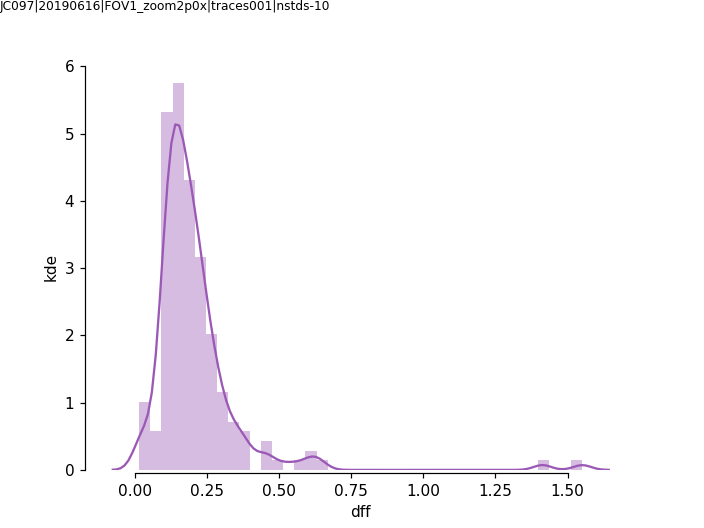

In [563]:
fig, ax = pl.subplots()
ax = hist_roi_stat(estats.gdf, metric='dff', roi_list=roi_list, ax=ax)

label_figure(fig, data_identifier)
pl.savefig(os.path.join(summarydir, 'hist-avg-dff-best-cfg.png'))


# Load tuning fits

In [13]:
# Get responsivity stats:
responsive_test = 'nstds'
responsive_thr = 10
n_stds = 2.5

# Tuning params
n_bootstrap_iters = 1000
n_resamples = 20
n_intervals_interp = 3
min_cfgs_above = 2

In [14]:
create_new = False
plot_rois = False
goodness_thr = 0.66
n_processes = 8

In [15]:
bootresults, fitparams = exp.get_tuning(create_new=create_new, n_processes=n_processes,
                                           responsive_test=responsive_test, responsive_thr=responsive_thr,
                                           n_stds=n_stds, min_cfgs_above=min_cfgs_above,
                                           n_bootstrap_iters=n_bootstrap_iters, n_resamples=n_resamples,
                                           n_intervals_interp=n_intervals_interp, make_plots=False)


...getting OSI results: fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20
Loading existing fits.


#### Test fit quality with goodness-of-fit metric

In [16]:
goodness_thr = 0.6

In [17]:
rmetrics, goodrois = exp.evaluate_fits(bootresults, fitparams, goodness_thr=goodness_thr,\
                                       rootdir=rootdir, make_plots=False)
print(rmetrics.shape)

Loading existing fits.
141 cells fit at least 1 tuning curve.


/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/bootstrap_osi.py:1230: RuntimeWarning: invalid value encountered in sqrt
  gfit = np.mean(bootr['results']['r2']) * (1-iqr) * np.sqrt(r2_comb)


43 cells have good fits (thr >= 0.60)
(43, 11)


In [18]:
rmetrics

asi   cell       dsi       gof        r2    r2comb  response_null  \
24   0.191290   24.0  0.074363  0.632734  0.789636  0.799521       0.230234   
38   0.543377   38.0  0.147366  0.819690  0.906602  0.937055       0.062144   
48   0.642770   48.0  0.115510  0.691190  0.855431  0.784770       0.113970   
64   0.187926   64.0  0.042578  0.651027  0.804258  0.873535       0.068259   
79   0.362348   79.0  0.044172  0.787851  0.898248  0.881880       0.055260   
90   0.531391   90.0  0.196283  0.953962  0.973457  0.982620       0.098252   
91   0.245096   91.0  0.072450  0.817696  0.907060  0.922480       0.047454   
93   0.288664   93.0  0.073894  0.688906  0.899352  0.681296       0.295702   
96   0.183583   96.0  0.154459  0.680536  0.889608  0.689809       0.059557   
121  0.215264  121.0  0.070662  0.614351  0.868507  0.604903       0.072528   
123  0.816051  123.0  0.145071  0.938570  0.965387  0.963808       0.163881   
134  0.354154  134.0  0.071194  0.788076  0.877158  0.917588       0.052291   
137  0.363690  137.0  0.101071  0.640633  0.843168  0.724485       0.133781   
142  0.514433  142.0  0.133214  0.838809  0.918720  0.926474       0.119464   
146  0.190593  146.0  0.107289  0.619783  0.844433  0.732076       0.072702   
147  0.447777  147.0  0.142746  0.684999  0.839655  0.821647       0.063908   
148  0.601478  148.0  0.105336  0.876434  0.932545  0.961789       0.045444   
165  0.268452  165.0  0.053781  0.714430  0.866675  0.818460       0.097151   
169  0.435932  169.0  0.077389  0.621273  0.777877  0.819723       0.045381   
172  0.195805  172.0  0.072015  0.604516  0.817252  0.718481       0.220221   
176  0.790146  176.0  0.121374  0.915806  0.955101  0.965092       0.047279   
178  0.560970  178.0  0.130468  0.683685  0.860649  0.775805       0.085547   
187  0.322724  187.0  0.091717  0.832535  0.915459  0.943092       0.050280   
193  0.440542  193.0  0.097430  0.725877  0.849399  0.866494       0.050820   
207  0.208033  207.0  0.065677  0.797302  0.894681  0.908755       0.063556   
211  0.281277  211.0  0.175489  0.642557  0.826484  0.786683       0.084579   
238  0.791270  238.0  0.111222  0.894104  0.942497  0.949729       0.063223   
243  0.207117  243.0  0.054888  0.627101  0.843429  0.647417       0.076114   
250  0.351951  250.0  0.064166  0.604036  0.805267  0.753432       0.068997   
254  0.325144  254.0  0.224201  0.791822  0.896145  0.916503       0.092000   
256  0.586453  256.0  0.138036  0.866546  0.928441  0.940842       0.054099   
268  0.253700  268.0  0.156546  0.630970  0.783385  0.782084       0.037604   
285  0.173262  285.0  0.094249  0.719641  0.874645  0.834638       0.046716   
319  0.224338  319.0  0.057188  0.637933  0.880813  0.636213       0.084719   
355  0.248359  355.0  0.252512  0.629844  0.814335  0.793409       0.027986   
384  0.152349  384.0  0.142658  0.620090  0.887233  0.589476       0.036798   
388  0.088408  388.0  0.048177  0.843265  0.918203  0.950632       0.091510   
389  0.256226  389.0  0.114529  0.695006  0.820912  0.862880       0.029336   
390  0.310383  390.0  0.109778  0.758941  0.869067  0.951987       0.030235   
411  0.376463  411.0  0.086172  0.707403  0.883795  0.745449       0.037393   
418  0.173101  418.0  0.130352  0.602134  0.819167  0.738177       0.071807   
423  0.233722  423.0  0.078655  0.635997  0.801882  0.823041       0.043802   
428  0.669178  428.0  0.131948  0.804892  0.901121  0.883245       0.079935   

     response_offset  response_pref      sigma  theta_pref  
24         -0.126266       0.247837  62.220619   61.768414  
38          0.000503       0.085060  29.007815  309.795455  
48          0.005232       0.139783  24.277308  195.725677  
64          0.050924       0.082002  24.412606  265.009839  
79         -0.011410       0.058840  43.169932  244.761229  
90          0.018604       0.138446  23.910592  358.546125  
91          0.023869       0.064788  28.716606  264.226412  
93         -0.051883       0.346612  44.18752

# Set output dir to tuning dir

In [19]:
tuningdir = fitparams['directory']
print tuningdir

/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_3b241d_traces001_ebfa5b_traces001_f5e412_traces001_f07566/tuning/fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20


# Visualize tuning characteristics of well-fit neurons

In [20]:

fit_desc = os.path.split(fitparams['directory'])[-1]
data_identifier = '|'.join([exp.animalid, exp.session, exp.fov, exp.traceid, fit_desc])


In [21]:
df = rmetrics[rmetrics['cell'].isin(goodrois)]
print(df.shape)

(43, 11)


In [22]:
df.head()

asi  cell       dsi       gof        r2    r2comb  response_null  \
24  0.191290  24.0  0.074363  0.632734  0.789636  0.799521       0.230234   
38  0.543377  38.0  0.147366  0.819690  0.906602  0.937055       0.062144   
48  0.642770  48.0  0.115510  0.691190  0.855431  0.784770       0.113970   
64  0.187926  64.0  0.042578  0.651027  0.804258  0.873535       0.068259   
79  0.362348  79.0  0.044172  0.787851  0.898248  0.881880       0.055260   

    response_offset  response_pref      sigma  theta_pref  
24        -0.126266       0.247837  62.220619   61.768414  
38         0.000503       0.085060  29.007815  309.795455  
48         0.005232       0.139783  24.277308  195.725677  
64         0.050924       0.082002  24.412606  265.009839  
79        -0.011410       0.058840  43.169932  244.761229

#### Sort by DSI

In [23]:
def rois_sortby(fitdf, sort_by='DSI', plot_metric='theta_pref', roi_list=None, descending=True):
    if roi_list is not None:
        df = fitdf[fitdf['cell'].isin(roi_list)]
    else:
        df = fitdf.copy()
    
    if 'theta' in sort_by:
        dsi_values = df.groupby(['cell'])[plot_metric].apply(np.deg2rad).apply(spstats.circmean).apply(np.rad2deg)
    elif 'rad' in sort_by:
        dsi_values = df.groupby(['cell'])[plot_metric].apply(np.deg2rad).apply(spstats.circmean).apply(np.rad2deg)
    else:
        dsi_values = df.groupby(['cell']).mean()[sort_by]
    if descending:
        dsi_sorted_ixs = np.argsort(dsi_values).values[::-1] #Sort from biggest to smallest
    else:
        dsi_sorted_ixs = np.argsort(dsi_values).values #Sort from smallest to biggest
    rsort_by_dsi = np.array(dsi_values.index.tolist())[dsi_sorted_ixs]

    return rsort_by_dsi


In [24]:
def split_even_odd_trials(bootresults, rsort_by):
    evens = []
    odds = []
    for roi in rsort_by:
        evens_t = np.vstack([bootr['data']['responses'][0::2].mean().values for stimparam, bootr in bootresults[roi].items()]).mean(axis=0)
        odds_t = np.vstack([bootr['data']['responses'][1::2].mean().values for stimparam, bootr in bootresults[roi].items()]).mean(axis=0)
        evens.append(evens_t)
        odds.append(odds_t)
    evens = np.array(evens)
    odds = np.array(odds)
    return evens, odds

In [25]:
def plot_even_odd_trials(evens, odds, rsort_by, cmap='inferno', tested_values=None):

    fig, axes = pl.subplots(1,2, sharex=True, sharey=True)
    cbar_ax = fig.add_axes([.85, .3, .03, .4])
    vmin = min([evens.min(), odds.min()])
    vmax = max([evens.max(), odds.max()])

    sns.heatmap(evens, ax=axes[0], cbar=True, vmin=vmin, vmax=vmax, cbar_ax=cbar_ax, cmap=cmap)
    axes[0].set_title('evens')
    axes[0].set_xticklabels(tested_values, rotation=45)

    sns.heatmap(odds, ax=axes[1], cbar=0, vmin=vmin, vmax=vmax, cbar_ax=None, cmap=cmap)
    axes[1].set_title('odds')
    axes[1].set_xticklabels(tested_values, rotation=45)
    axes[1].tick_params(labelsize=8)

    axes[0].set_ylabel('cell')
    axes[0].set_yticks(np.arange(0, len(rsort_by))) 
    axes[0].set_yticklabels([int(i) for i in rsort_by], rotation=45) #(tested_values, rotation=45)
    axes[0].tick_params(axis='y', labelsize=6)
    cbar_ax.set_title(response_type)

    pl.subplots_adjust(wspace=0.05, right=0.80)
    
    return fig

In [617]:
df

asi   cell       dsi       gof        r2    r2comb  response_null  \
24   0.191290   24.0  0.074363  0.632734  0.789636  0.799521       0.230234   
38   0.543377   38.0  0.147366  0.819690  0.906602  0.937055       0.062144   
48   0.642770   48.0  0.115510  0.691190  0.855431  0.784770       0.113970   
64   0.187926   64.0  0.042578  0.651027  0.804258  0.873535       0.068259   
79   0.362348   79.0  0.044172  0.787851  0.898248  0.881880       0.055260   
90   0.531391   90.0  0.196283  0.953962  0.973457  0.982620       0.098252   
91   0.245096   91.0  0.072450  0.817696  0.907060  0.922480       0.047454   
93   0.288664   93.0  0.073894  0.688906  0.899352  0.681296       0.295702   
96   0.183583   96.0  0.154459  0.680536  0.889608  0.689809       0.059557   
121  0.215264  121.0  0.070662  0.614351  0.868507  0.604903       0.072528   
123  0.816051  123.0  0.145071  0.938570  0.965387  0.963808       0.163881   
134  0.354154  134.0  0.071194  0.788076  0.877158  0.917588       0.052291   
137  0.363690  137.0  0.101071  0.640633  0.843168  0.724485       0.133781   
142  0.514433  142.0  0.133214  0.838809  0.918720  0.926474       0.119464   
146  0.190593  146.0  0.107289  0.619783  0.844433  0.732076       0.072702   
147  0.447777  147.0  0.142746  0.684999  0.839655  0.821647       0.063908   
148  0.601478  148.0  0.105336  0.876434  0.932545  0.961789       0.045444   
165  0.268452  165.0  0.053781  0.714430  0.866675  0.818460       0.097151   
169  0.435932  169.0  0.077389  0.621273  0.777877  0.819723       0.045381   
172  0.195805  172.0  0.072015  0.604516  0.817252  0.718481       0.220221   
176  0.790146  176.0  0.121374  0.915806  0.955101  0.965092       0.047279   
178  0.560970  178.0  0.130468  0.683685  0.860649  0.775805       0.085547   
187  0.322724  187.0  0.091717  0.832535  0.915459  0.943092       0.050280   
193  0.440542  193.0  0.097430  0.725877  0.849399  0.866494       0.050820   
207  0.208033  207.0  0.065677  0.797302  0.894681  0.908755       0.063556   
211  0.281277  211.0  0.175489  0.642557  0.826484  0.786683       0.084579   
238  0.791270  238.0  0.111222  0.894104  0.942497  0.949729       0.063223   
243  0.207117  243.0  0.054888  0.627101  0.843429  0.647417       0.076114   
250  0.351951  250.0  0.064166  0.604036  0.805267  0.753432       0.068997   
254  0.325144  254.0  0.224201  0.791822  0.896145  0.916503       0.092000   
256  0.586453  256.0  0.138036  0.866546  0.928441  0.940842       0.054099   
268  0.253700  268.0  0.156546  0.630970  0.783385  0.782084       0.037604   
285  0.173262  285.0  0.094249  0.719641  0.874645  0.834638       0.046716   
319  0.224338  319.0  0.057188  0.637933  0.880813  0.636213       0.084719   
355  0.248359  355.0  0.252512  0.629844  0.814335  0.793409       0.027986   
384  0.152349  384.0  0.142658  0.620090  0.887233  0.589476       0.036798   
388  0.088408  388.0  0.048177  0.843265  0.918203  0.950632       0.091510   
389  0.256226  389.0  0.114529  0.695006  0.820912  0.862880       0.029336   
390  0.310383  390.0  0.109778  0.758941  0.869067  0.951987       0.030235   
411  0.376463  411.0  0.086172  0.707403  0.883795  0.745449       0.037393   
418  0.173101  418.0  0.130352  0.602134  0.819167  0.738177       0.071807   
423  0.233722  423.0  0.078655  0.635997  0.801882  0.823041       0.043802   
428  0.669178  428.0  0.131948  0.804892  0.901121  0.883245       0.079935   

     response_offset  response_pref      sigma  theta_pref  
24         -0.126266       0.247837  62.220619   61.768414  
38          0.000503       0.085060  29.007815  309.795455  
48          0.005232       0.139783  24.277308  195.725677  
64          0.050924       0.082002  24.412606  265.009839  
79         -0.011410       0.058840  43.169932  244.761229  
90          0.018604       0.138446  23.910592  358.546125  
91          0.023869       0.064788  28.716606  264.226412  
93         -0.051883       0.346612  44.18752

# Compare even and odd trials for cells with good tuning fits

In [44]:
tested_values = np.array(estats.sdf['ori'].unique().astype(float))
cmap = 'inferno'

<IPython.core.display.Javascript object>


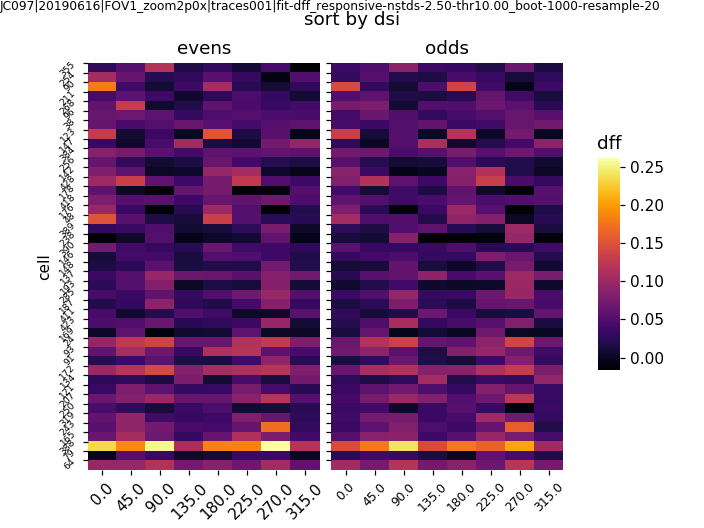

gof-0.60_tuning-on-evens-vs-odd-trials_sort-by-dsi


In [619]:
# Sort by DSI
sort_by = 'dsi'
rsort_by = rois_sortby(df, sort_by=sort_by, plot_metric='theta_pref', roi_list=None, descending=True)
evens, odds = split_even_odd_trials(bootresults, rsort_by)

fig = plot_even_odd_trials(evens, odds, rsort_by, cmap=cmap, tested_values=tested_values)
fig.suptitle('sort by %s' % sort_by)

label_figure(fig, data_identifier)

figname = 'gof-%.2f_tuning-on-evens-vs-odd-trials_sort-by-%s' % (goodness_thr, sort_by)
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))
print figname

<IPython.core.display.Javascript object>


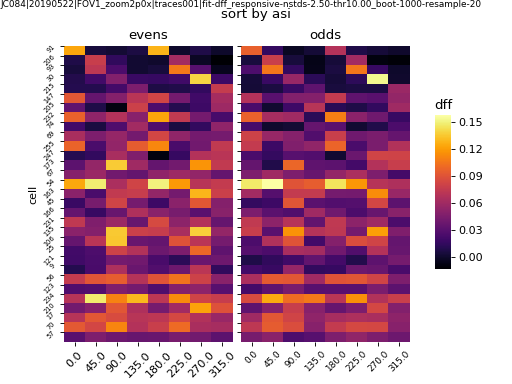

gof-0.66_tuning-on-evens-vs-odd-trials_sort-by-asi


In [113]:
# Sort by ASI
sort_by = 'asi'
rsort_by = rois_sortby(df, sort_by=sort_by, plot_metric='theta_pref', roi_list=None, descending=True)
evens, odds = split_even_odd_trials(bootresults, rsort_by)

fig = plot_even_odd_trials(evens, odds, rsort_by, cmap=cmap, tested_values=tested_values)
fig.suptitle('sort by %s' % sort_by)

label_figure(fig, data_identifier)

figname = 'gof-%.2f_tuning-on-evens-vs-odd-trials_sort-by-%s' % (goodness_thr, sort_by)
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))
print figname

#### Sort by preferred theta

<IPython.core.display.Javascript object>


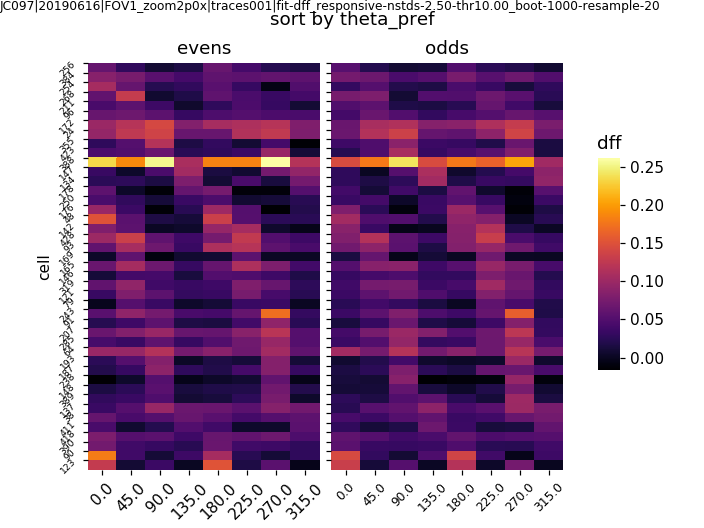

gof-0.60_tuning-on-evens-vs-odd-trials_sort-by-theta_pref


In [620]:
# Sort by DSI
sort_by = 'theta_pref'
rsort_by = rois_sortby(df, sort_by=sort_by, plot_metric='theta_pref', roi_list=None, descending=False)
evens, odds = split_even_odd_trials(bootresults, rsort_by)

fig = plot_even_odd_trials(evens, odds, rsort_by, cmap=cmap, tested_values=tested_values)
fig.suptitle('sort by %s' % sort_by)

label_figure(fig, data_identifier)

figname = 'gof-%.2f_tuning-on-evens-vs-odd-trials_sort-by-%s' % (goodness_thr, sort_by)
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))
print figname




# figname= '%s_tuning-on-evens-vs-odd-iters_sort-by-preferredtheta' % filter_str
# pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))
# figname

# Look at distN of each metric

<IPython.core.display.Javascript object>


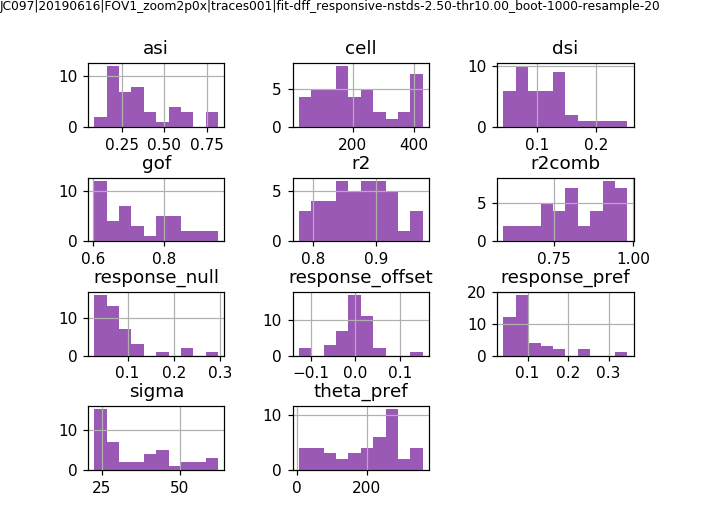

hist-each-param_gof-0.60


In [621]:

fig = rmetrics.hist()
pl.subplots_adjust(hspace=0.8, wspace=0.5)

label_figure(fig[0][0].figure, data_identifier)

figname = 'hist-each-param_gof-%.2f' % goodness_thr
print(figname)
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))

# Compare metrics pair-wise

In [622]:
from pandas.plotting import scatter_matrix


<IPython.core.display.Javascript object>


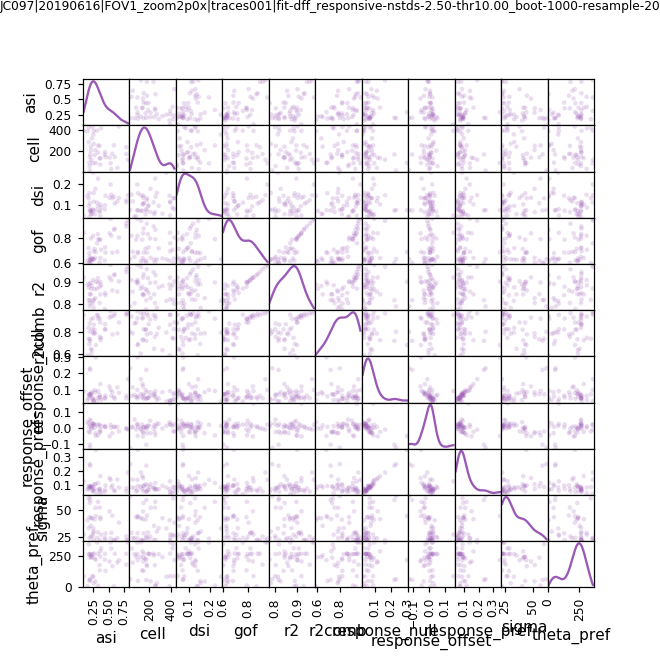

scatter-matrix_gof-0.60


In [623]:

fig = scatter_matrix(rmetrics, alpha=0.2, figsize=(6, 6), diagonal='kde')

label_figure(fig[0][0].figure, data_identifier)
figname = 'scatter-matrix_gof-%.2f' % goodness_thr
print(figname)
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))

# Find closest matching tested theta to plot histogram of preferred angles

In [26]:
from collections import Counter
from matplotlib import patches

def hist_gratings_stats(tuningdf, all_categories, colorvals, variable='pref_theta', ax=None,
                        thresh=0.33, ori_metric='ASI', show_selective=False):
        
    best_ori_vals = tuningdf[variable]
    best_ori_vals_selective = tuningdf[tuningdf[ori_metric] >= thresh][variable]
    
    ori_counts_all = Counter(best_ori_vals)
    if all_categories is not None:
        for catg in all_categories:
            if catg not in ori_counts_all:
                ori_counts_all[catg] = 0
                
    ori_counts_selective = Counter(best_ori_vals_selective)
    for ori in ori_counts_all.keys():
        if ori not in ori_counts_selective.keys():
            ori_counts_selective[ori] = 0
   
    bar_palette = colorvals.as_hex()
    
    if ax is None:
        fig, ax = pl.subplots()
    
    sns.barplot(sorted(ori_counts_all.keys()), [ori_counts_all[c] for c in sorted(ori_counts_all.keys())], palette=bar_palette, ax=ax)
    ax.tick_params(axis='x', which='both', length=0)

    if show_selective:    
        ax2 = ax.twinx()
        sns.barplot(sorted(ori_counts_all.keys()), [ori_counts_selective[c] for c in sorted(ori_counts_all.keys())], palette=bar_palette, ax=ax2)
        ax2.set_ylim(ax.get_ylim())
        hatch = '//' #itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
        for i, bar in enumerate(ax2.patches):
            bar.set_hatch(hatch)
        ax2.set_yticklabels([])
        ax2.tick_params(axis='both', which='both', length=0)
    
        hatch1 = patches.Patch( facecolor='white', hatch=r'\\\\',label='%s > %.2f' % (ori_metric, thresh))
        ax2.legend(handles = [hatch1], loc=1)
        
    sns.despine(trim=True, offset=4)
        
    return ax

In [27]:
tested_values

NameError: name 'tested_values' is not defined

In [45]:
tested_thetas = list(tested_values.copy())
tested_thetas.append(360)

tested_thetas = np.array(tested_thetas)

rmetrics['theta_tested'] = [tested_thetas[np.where(np.abs(t-tested_thetas)== np.min(np.abs(t-tested_thetas)))[0][0]] % 360. \
                            for t in rmetrics['theta_pref']]
tested_thetas = tested_thetas[0:-1]

In [46]:
for t in rmetrics['theta_pref']:
    closest_match = int(tested_thetas[np.where(np.abs(t-tested_thetas)== np.min(np.abs(t-tested_thetas)))])
    print round(t,2), closest_match

61.77 45
309.8 315
195.73 180
265.01 270
244.76 225
358.55 315
264.23 270
216.88 225
48.0 45
240.25 225
359.93 315
133.41 135
287.05 270
205.26 225
235.59 225
129.49 135
267.81 270
229.74 225
219.73 225
56.77 45
180.15 180
167.76 180
267.25 270
266.93 270
264.84 270
44.96 45
267.8 270
254.54 270
175.59 180
10.42 0
5.03 0
29.8 45
264.94 270
239.88 225
82.23 90
5.44 0
87.24 90
269.35 270
358.15 315
311.46 315
343.75 315
86.76 90
215.42 225


In [47]:
tested_thetas

array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

In [48]:
rmetrics

asi   cell       dsi       gof        r2    r2comb  response_null  \
24   0.191290   24.0  0.074363  0.632734  0.789636  0.799521       0.230234   
38   0.543377   38.0  0.147366  0.819690  0.906602  0.937055       0.062144   
48   0.642770   48.0  0.115510  0.691190  0.855431  0.784770       0.113970   
64   0.187926   64.0  0.042578  0.651027  0.804258  0.873535       0.068259   
79   0.362348   79.0  0.044172  0.787851  0.898248  0.881880       0.055260   
90   0.531391   90.0  0.196283  0.953962  0.973457  0.982620       0.098252   
91   0.245096   91.0  0.072450  0.817696  0.907060  0.922480       0.047454   
93   0.288664   93.0  0.073894  0.688906  0.899352  0.681296       0.295702   
96   0.183583   96.0  0.154459  0.680536  0.889608  0.689809       0.059557   
121  0.215264  121.0  0.070662  0.614351  0.868507  0.604903       0.072528   
123  0.816051  123.0  0.145071  0.938570  0.965387  0.963808       0.163881   
134  0.354154  134.0  0.071194  0.788076  0.877158  0.917588       0.052291   
137  0.363690  137.0  0.101071  0.640633  0.843168  0.724485       0.133781   
142  0.514433  142.0  0.133214  0.838809  0.918720  0.926474       0.119464   
146  0.190593  146.0  0.107289  0.619783  0.844433  0.732076       0.072702   
147  0.447777  147.0  0.142746  0.684999  0.839655  0.821647       0.063908   
148  0.601478  148.0  0.105336  0.876434  0.932545  0.961789       0.045444   
165  0.268452  165.0  0.053781  0.714430  0.866675  0.818460       0.097151   
169  0.435932  169.0  0.077389  0.621273  0.777877  0.819723       0.045381   
172  0.195805  172.0  0.072015  0.604516  0.817252  0.718481       0.220221   
176  0.790146  176.0  0.121374  0.915806  0.955101  0.965092       0.047279   
178  0.560970  178.0  0.130468  0.683685  0.860649  0.775805       0.085547   
187  0.322724  187.0  0.091717  0.832535  0.915459  0.943092       0.050280   
193  0.440542  193.0  0.097430  0.725877  0.849399  0.866494       0.050820   
207  0.208033  207.0  0.065677  0.797302  0.894681  0.908755       0.063556   
211  0.281277  211.0  0.175489  0.642557  0.826484  0.786683       0.084579   
238  0.791270  238.0  0.111222  0.894104  0.942497  0.949729       0.063223   
243  0.207117  243.0  0.054888  0.627101  0.843429  0.647417       0.076114   
250  0.351951  250.0  0.064166  0.604036  0.805267  0.753432       0.068997   
254  0.325144  254.0  0.224201  0.791822  0.896145  0.916503       0.092000   
256  0.586453  256.0  0.138036  0.866546  0.928441  0.940842       0.054099   
268  0.253700  268.0  0.156546  0.630970  0.783385  0.782084       0.037604   
285  0.173262  285.0  0.094249  0.719641  0.874645  0.834638       0.046716   
319  0.224338  319.0  0.057188  0.637933  0.880813  0.636213       0.084719   
355  0.248359  355.0  0.252512  0.629844  0.814335  0.793409       0.027986   
384  0.152349  384.0  0.142658  0.620090  0.887233  0.589476       0.036798   
388  0.088408  388.0  0.048177  0.843265  0.918203  0.950632       0.091510   
389  0.256226  389.0  0.114529  0.695006  0.820912  0.862880       0.029336   
390  0.310383  390.0  0.109778  0.758941  0.869067  0.951987       0.030235   
411  0.376463  411.0  0.086172  0.707403  0.883795  0.745449       0.037393   
418  0.173101  418.0  0.130352  0.602134  0.819167  0.738177       0.071807   
423  0.233722  423.0  0.078655  0.635997  0.801882  0.823041       0.043802   
428  0.669178  428.0  0.131948  0.804892  0.901121  0.883245       0.079935   

     response_offset  response_pref      sigma  theta_pref  theta_tested  
24         -0.126266       0.247837  62.220619   61.768414          45.0  
38          0.000503       0.085060  29.007815  309.795455         315.0  
48          0.005232       0.139783  24.277308  195.725677         180.0  
64          0.050924       0.082002  24.412606  265.009839         270.0  
79         -0.011410       0.058840  43.169932  244.761229         225.0  
90          0.018604       0.138446  23.910592  358.546125           0.0  
91      

<IPython.core.display.Javascript object>


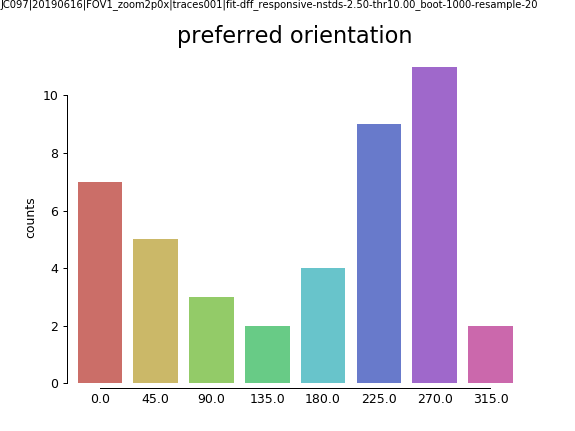

hist-tested-oris_gof-0.60


In [50]:


cmap = 'hls'
noris = len(tested_values)

fig, ax = pl.subplots()
colorvals = sns.color_palette(cmap, noris) # len(gratings_sconfigs))
#show_selective = False if filter_gof else True
if tested_thetas.shape[0] > 0:
    hist_gratings_stats(rmetrics, tested_thetas, colorvals, ax=ax, variable='theta_tested',
                       thresh=goodness_thr, ori_metric='gof', show_selective=False)
ax.set_title('preferred orientation', fontsize=18)
ax.set_ylabel('counts')
        
    
    
label_figure(fig, data_identifier)
figname = 'hist-tested-oris_gof-%.2f' % goodness_thr
print(figname)
pl.savefig(os.path.join(tuningdir, '%s.svg' % figname))


# Preferred axis polar

<IPython.core.display.Javascript object>


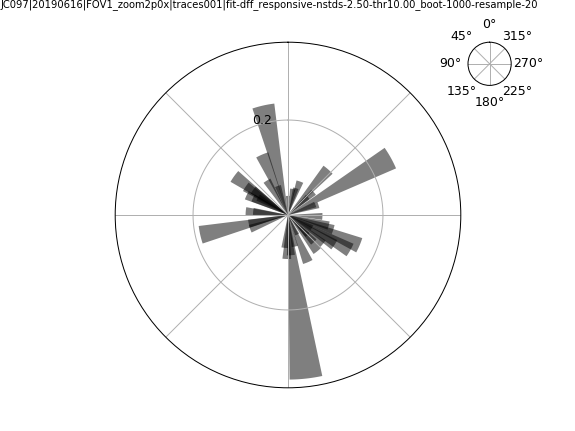

polar-preferred-oris_gof-0.60


In [51]:
fig = pl.figure()
fig.patch.set_alpha(1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
#lbs = []

radii = rmetrics['response_pref']
thetas = rmetrics['theta_pref']

bars = ax.bar(thetas, radii, width=.2, bottom=0.0, color='k', alpha=0.5)
for r,bar in zip(radii, bars):
    bar.set_alpha(0.5)
ax.set_theta_zero_location("N")
ax.set_xticklabels([])
maxval = min([round(ax.get_ylim()[-1], 1), 0.2])
ax.set_yticks([ax.get_ylim()[0], maxval])
ax.set_yticklabels(['', maxval])

pl.subplots_adjust(top=0.5)
# Legends
leg = fig.add_axes([0.8, 0.8, 0.1, 0.1], polar=True)
leg.set_yticks([])
leg.set_theta_zero_location("N")

#legend_handles = [mpatches.Patch(color=area_colors[visual_area], label=lb, alpha=0.5)\
#                  for visual_area, lb in zip(visual_areas, lbs)]
#leg.legend(bbox_to_anchor=(2, -1.5), loc='right', ncol=1, handles=legend_handles, fontsize=8)

label_figure(fig, data_identifier)
figname = 'polar-preferred-oris_gof-%.2f' % goodness_thr
print(figname)
pl.savefig(os.path.join(tuningdir, '%s.svg' % figname))


In [53]:
tuningdir

u'/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_3b241d_traces001_ebfa5b_traces001_f5e412_traces001_f07566/tuning/fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20'

# Split pref theta by DSI

<IPython.core.display.Javascript object>


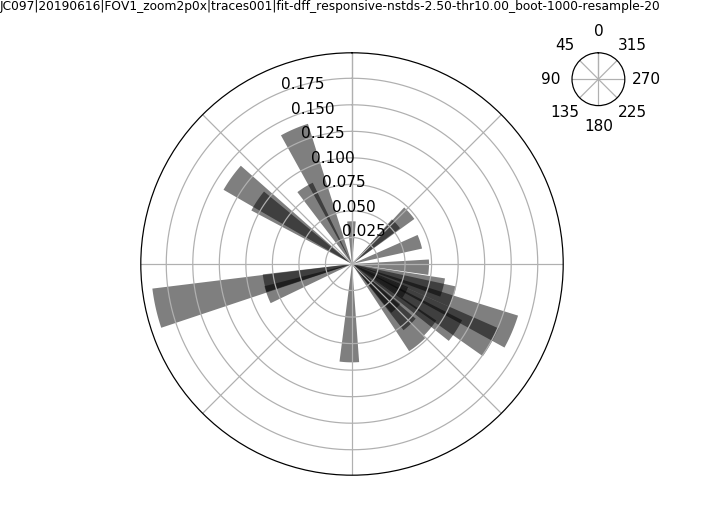

polar-DSI-pref-oris_gof-0.60


In [727]:
fig = pl.figure()
fig.patch.set_alpha(1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

subdf = rmetrics[rmetrics['dsi']>=0.1]

radii = subdf['response_pref']
thetas = subdf['theta_pref']

theta_vals = np.arange(0, 360+45, 45)

bars = ax.bar(thetas, radii, width=.2, bottom=0.0, color='k', alpha=0.5)
for r,bar in zip(radii, bars):
    bar.set_alpha(0.5)
ax.set_theta_zero_location("N")
ax.set_xlim([0, np.pi])
ax.set_xticks(np.deg2rad(theta_vals))
ax.set_xticklabels([''])
pl.subplots_adjust(top=0.5)

# Legends
leg = fig.add_axes([0.8, 0.8, 0.1, 0.1], polar=True)
leg.set_xlim([0, 2*np.pi])
leg.set_xticks(np.linspace(0, 2*np.pi, len(theta_vals)))
leg.set_xticklabels(theta_vals[0:-1])
leg.set_yticks([])
leg.set_theta_zero_location("N")


#legend_handles = [mpatches.Patch(color=area_colors[visual_area], label=lb, alpha=0.5)\
#                  for visual_area, lb in zip(visual_areas, lbs)]
#leg.legend(bbox_to_anchor=(2, -1.5), loc='right', ncol=1, handles=legend_handles, fontsize=8)

label_figure(fig, data_identifier)
figname = 'polar-DSI-pref-oris_gof-%.2f' % goodness_thr
print(figname)
pl.savefig(os.path.join(tuningdir, '%s.png' % figname))


# Split pref by ASI



<IPython.core.display.Javascript object>


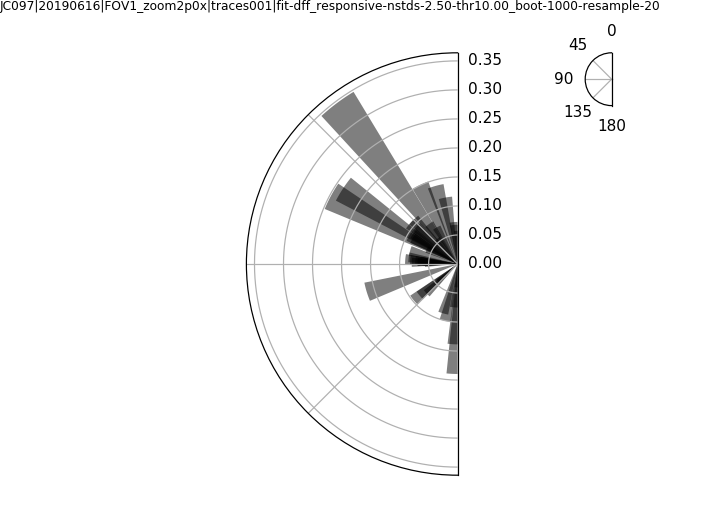

polar-ASI-pref-oris_gof-0.60


In [728]:
fig = pl.figure()
fig.patch.set_alpha(1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

subdf = rmetrics[rmetrics['asi']>=0.1]

radii = subdf['response_pref']
thetas = np.deg2rad( subdf['theta_pref'] % 180. )
theta_vals = np.arange(0, 180+45, 45)

bars = ax.bar(thetas, radii, width=.2, bottom=0.0, color='k', alpha=0.5)
for r,bar in zip(radii, bars):
    bar.set_alpha(0.5)
ax.set_theta_zero_location("N")
ax.set_xlim([0, np.pi])
ax.set_xticks(np.deg2rad(theta_vals))
ax.set_xticklabels([''])
pl.subplots_adjust(top=0.5)

# Legends
leg = fig.add_axes([0.8, 0.8, 0.1, 0.1], polar=True)
leg.set_xlim([0, np.pi])
leg.set_xticks(np.linspace(0, np.pi, len(theta_vals)))
leg.set_xticklabels(theta_vals)
leg.set_yticks([])
leg.set_theta_zero_location("N")

#legend_handles = [mpatches.Patch(color=area_colors[visual_area], label=lb, alpha=0.5)\
#                  for visual_area, lb in zip(visual_areas, lbs)]
#leg.legend(bbox_to_anchor=(2, -1.5), loc='right', ncol=1, handles=legend_handles, fontsize=8)

label_figure(fig, data_identifier)
figname = 'polar-ASI-pref-oris_gof-%.2f' % goodness_thr
print(figname)
pl.savefig(os.path.join(tuningdir, '%s.png' % figname))


In [729]:
tuningdir

u'/n/coxfs01/2p-data/JC097/20190616/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_3b241d_traces001_ebfa5b_traces001_f5e412_traces001_f07566/tuning/fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20'

# Plot preferred ori on fov

In [28]:
from pipeline.python.rois import utils as roiutils
import cv2 
import tifffile as tf

In [29]:
S = util.Session(animalid, session, fov)

[JC097] 20190616 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info


In [30]:
roiid = roiutils.get_roiid_from_traceid(animalid, session, fov, 'gratings', traceid=traceid)
print roiid

rois001


In [31]:
masks, _ = S.load_masks(roiid)
masks = np.swapaxes(masks, 0, 2)
masks = np.swapaxes(masks, 1, 2)

In [32]:
masks.shape

(432, 512, 512)

In [33]:
zimg_path = glob.glob(os.path.join(rootdir, exp.animalid, exp.session, 'ROIs', '%s*' % exp.rois, 'figures', '*.tif'))[0]
zimg = tf.imread(zimg_path)
zimg = zimg[:, :, 1]

<IPython.core.display.Javascript object>


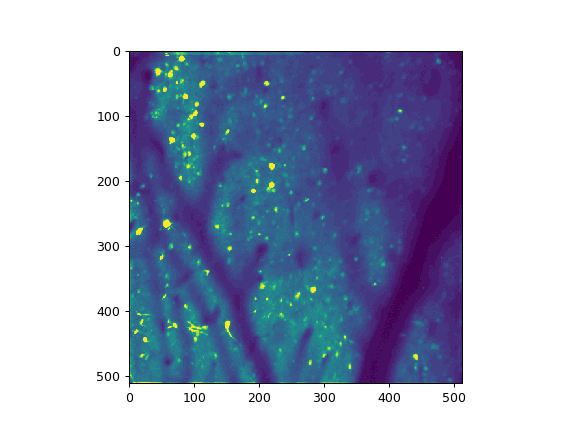

In [34]:
pl.figure()
pl.imshow(zimg)

In [36]:
dmasks = masks.copy()
kernel = np.ones((5,5),np.uint8)
for roi in range(masks.shape[0]):
    #dilation = cv2.dilate(dmasks[roi, :, :],kernel,iterations = 1)
    gradient = cv2.morphologyEx(dmasks[roi, :, :], cv2.MORPH_GRADIENT, kernel)

    dmasks[roi, :, :] = gradient
dmasks[masks==0] = np.nan
    

<IPython.core.display.Javascript object>


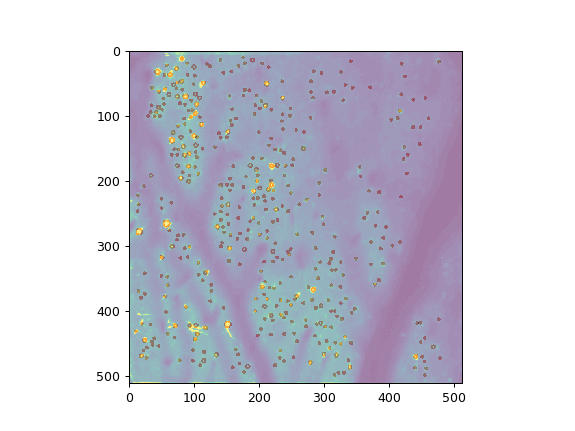

In [37]:
pl.figure()
pl.imshow(zimg)
m_img = np.nansum(dmasks,  axis=0)
#m_img[dmasks.sum(axis=0)==0] = np.nan

pl.imshow(m_img, alpha=0.5, cmap='Reds')

# Set colormap

In [38]:
def mask_rois(masks, value_array, mask_thr=0.1):
    nrois, d1, d2 = masks.shape
    dims = (d1, d2)
    
    #masked = np.ma.masked_where(mask == 0, mask)

    
    value_mask =  np.ones(dims)*-100
    for rid in value_array.index.tolist():
        value_mask[masks[rid,:,:]>=mask_thr] = value_array[rid]

    return value_mask


In [54]:
tested_thetas = np.linspace(0, 360, 45)
from matplotlib.colors import ListedColormap

colormap = 'hls'
ori_colors = sns.color_palette(colormap, n_colors=len(tested_thetas))

cmap = ListedColormap(colors=ori_colors)



In [55]:
rois_plot = np.array(rmetrics.index.tolist())
#masks_plot = masks[rois_plot, :, :]
masks_values = rmetrics['theta_tested']
#masks_values = rmetrics_by_cfg[rmetrics_by_cfg['cell']==roi].sort_values(by='response_pref')['theta_pref'][0]

value_mask = mask_rois(dmasks, masks_values)
value_mask.shape
ori_mask = value_mask.copy()
ori_mask[value_mask==-100]=np.nan

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.


In [56]:
roi = 123

In [57]:
rmetrics_by_cfg[rmetrics_by_cfg['cell']==roi].sort_values(by='response_pref')

NameError: name 'rmetrics_by_cfg' is not defined

In [58]:
zimg.max()

65535

<IPython.core.display.Javascript object>


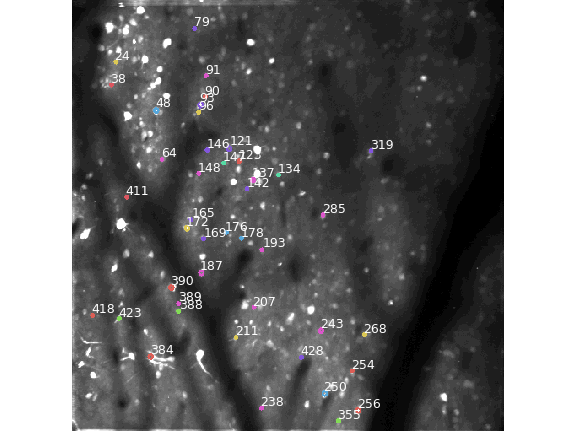

overlay-pref-theta_gof-0.60_43rois_label


In [62]:
label_rois = True
label_str = '_label' if label_rois else ''

fig, ax = pl.subplots() #pl.figure()
ax.imshow(zimg, cmap='gray', alpha=1)
ax.imshow(ori_mask, cmap=cmap)

if label_rois:
    for roi in rmetrics.index.tolist():
        yp, xp = np.where(~np.isnan(dmasks[roi, :, :]))
        ax.text(xp[0], yp[0], roi, fontsize=10, color='w')
    
ax.axis('off')
pl.subplots_adjust(top=1, bottom=0, left=0, right=1)
figname = 'overlay-pref-theta_gof-%.2f_%irois%s' % (goodness_thr, rmetrics.shape[0], label_str)
pl.savefig(os.path.join(tuningdir, '%s.svg' % figname))
print figname


<IPython.core.display.Javascript object>


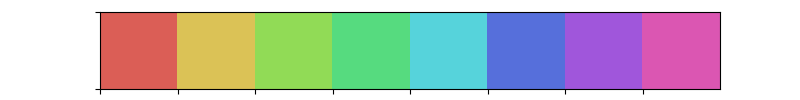

In [74]:
sns.palplot(ori_colors)

In [273]:
rmetrics

asi   cell       dsi       gof        r2    r2comb  response_null  \
24   0.191290   24.0  0.074363  0.632734  0.789636  0.799521       0.230234   
38   0.604663   38.0  0.185136  0.841219  0.916602  0.947064       0.064502   
48   0.642770   48.0  0.115510  0.691190  0.855431  0.784770       0.113970   
64   0.218781   64.0  0.049940  0.647674  0.803588  0.852867       0.072891   
79   0.362348   79.0  0.044172  0.787851  0.898248  0.881880       0.055260   
90   0.563073   90.0  0.191435  0.954278  0.974092  0.980820       0.102481   
91   0.271184   91.0  0.102609  0.805866  0.899569  0.913348       0.044694   
93   0.288664   93.0  0.073894  0.688906  0.899352  0.681296       0.295702   
96   0.183583   96.0  0.154459  0.680536  0.889608  0.689809       0.059557   
121  0.215264  121.0  0.070662  0.614351  0.868507  0.604903       0.072528   
123  0.811201  123.0  0.112455  0.948925  0.970486  0.970246       0.170031   
134  0.354154  134.0  0.071194  0.788076  0.877158  0.917588       0.052291   
137  0.363690  137.0  0.101071  0.640633  0.843168  0.724485       0.133781   
142  0.544609  142.0  0.122832  0.807468  0.897575  0.898673       0.148242   
146  0.190593  146.0  0.107289  0.619783  0.844433  0.732076       0.072702   
147  0.420918  147.0  0.116210  0.779517  0.883449  0.882190       0.076093   
148  0.559329  148.0  0.117640  0.885987  0.937726  0.964184       0.050198   
165  0.268500  165.0  0.056174  0.737846  0.887945  0.802465       0.131737   
169  0.660451  169.0  0.072420  0.794765  0.881399  0.907715       0.051913   
172  0.195805  172.0  0.072015  0.604516  0.817252  0.718481       0.220221   
176  0.657951  176.0  0.116181  0.907357  0.952296  0.953939       0.116505   
178  0.560970  178.0  0.130468  0.683685  0.860649  0.775805       0.085547   
187  0.281596  187.0  0.072708  0.734630  0.874413  0.831415       0.058434   
193  0.440542  193.0  0.097430  0.725877  0.849399  0.866494       0.050820   
207  0.208184  207.0  0.060138  0.705864  0.843456  0.821172       0.082600   
211  0.281277  211.0  0.175489  0.642557  0.826484  0.786683       0.084579   
238  0.791270  238.0  0.111222  0.894104  0.942497  0.949729       0.063223   
243  0.232449  243.0  0.165005  0.747183  0.886788  0.794188       0.048410   
250  0.351951  250.0  0.064166  0.604036  0.805267  0.753432       0.068997   
254  0.325144  254.0  0.224201  0.791822  0.896145  0.916503       0.092000   
256  0.588129  256.0  0.094034  0.849642  0.928125  0.913979       0.065749   
268  0.253700  268.0  0.156546  0.630970  0.783385  0.782084       0.037604   
285  0.156424  285.0  0.107939  0.678935  0.860673  0.756818       0.053807   
319  0.224338  319.0  0.057188  0.637933  0.880813  0.636213       0.084719   
355  0.248359  355.0  0.252512  0.629844  0.814335  0.793409       0.027986   
384  0.152349  384.0  0.142658  0.620090  0.887233  0.589476       0.036798   
388  0.143793  388.0  0.042800  0.864588  0.931551  0.946360       0.109662   
389  0.256226  389.0  0.114529  0.695006  0.820912  0.862880       0.029336   
390  0.266199  390.0  0.116574  0.735716  0.858738  0.918601       0.080380   
411  0.377688  411.0  0.105064  0.749545  0.892330  0.806031       0.060207   
418  0.173101  418.0  0.130352  0.602134  0.819167  0.738177       0.071807   
423  0.235174  423.0  0.068872  0.638283  0.809082  0.798525       0.052598   
428  0.392778  428.0  0.095138  0.808522  0.912056  0.875915       0.164904   

     response_offset  response_pref      sigma  theta_pref  theta_tested  
24         -0.126266       0.247837  62.220619   61.768414          45.0  
38          0.001382       0.100336  25.799682  221.515577         225.0  
48          0.005232       0.139783  24.277308  195.725677         180.0  
64          0.047762       0.091431  23.516767  267.685845         270.0  
79         -0.011410       0.058840  43.169932  244.761229         225.0  
90          0.015672       0.138535  23.546798  359.530339         315.0  
91      

In [274]:
session

'20190616'

# Make psth plots

In [63]:
def temporal_downsample(trace, windowsz):
    tmp1=np.concatenate((np.ones(windowsz)*trace[0], trace, np.ones(windowsz)*trace[-1]),0)
    tmp2=np.convolve(tmp1, np.ones(windowsz)/windowsz, 'same')
    tmp2=tmp2[windowsz:-windowsz]
    return tmp2

In [64]:
meanr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).mean()['dff'], name=roi) \
                   for roi in estats.rois], axis=1).T
meanr.shape

(181, 64)

In [65]:
rmetrics2, rmetrics_by_cfg = osi.get_good_fits(bootresults, fitparams, gof_thr=goodness_thr)


141 cells fit at least 1 tuning curve.


In [66]:
roi = 123

In [67]:
rmetrics_by_cfg[rmetrics_by_cfg['cell']==roi].sort_values(by='response_pref')

asi   cell       dsi       gof        r2    r2comb  \
sf-0.10-sz-200-sp-10  0.816051  123.0  0.145071  0.938570  0.965387  0.963808   
sf-0.10-sz-200-sp-20  0.806351  123.0  0.079839  0.959279  0.975584  0.976684   

                      response_null  response_offset  response_pref  sigma  \
sf-0.10-sz-200-sp-10       0.163881        -0.012121       0.189505   22.5   
sf-0.10-sz-200-sp-20       0.176181        -0.009830       0.218061   22.5   

                      theta_pref  
sf-0.10-sz-200-sp-10  359.934949  
sf-0.10-sz-200-sp-20  179.294011

In [68]:
roidfs=[]
metrics_by_config = []
niters=1000
fitresults = []
stimkeys = []
for stimparam, bootr in bootresults[roi].items():
    if bootr['fits'] is None:
        #print("%s: no fit" % str(stimparam))
        continue
    r2comb, gof, fitr = osi.evaluate_fits(bootr, interp=True)
    if np.isnan(gof) or gof < goodness_thr:
        #print("%s: bad fit" % str(stimparam))
        continue

    rfdf = bootr['results']
    rfdf['r2comb'] = [r2comb for _ in range(niters)]
    rfdf['gof'] = [gof for _ in range(niters)]

    tmpd = osi.average_metrics_across_iters(rfdf) #pd.DataFrame(rfdf.mean(axis=0)).T #, index=[roi])
    stimkey = 'sf-%.2f-sz-%i-sp-%i' % stimparam
    #tmpd['stimconfig'] = str(stimparam)
    print stimparam, gof, tmpd['theta_pref']

    fitresults.append(tmpd)
    stimkeys.append(stimkey)
print stimkeys

if len(fitresults) > 0:
    roif = pd.concat(fitresults, axis=0).reset_index(drop=True)
    roif.index = stimkeys
    gof =  roif.mean()['gof']

    if gof >= 0.66:
        goodrois.append(roi)

    roidfs.append(pd.DataFrame(roif.sort_values(by='response_pref').iloc[0]).T)
    #roidfs.append(osi.average_metrics_across_iters(roif))

    #roidfs.append(pd.Series(roif.mean(axis=0), name=roi))
    metrics_by_config.append(roif)


(0.1, 200.0, 20.0) 0.9592793385344336 123    179.294011
Name: theta_pref, dtype: float64
(0.1, 200.0, 10.0) 0.9385700600257315 123    359.934949
Name: theta_pref, dtype: float64
['sf-0.10-sz-200-sp-20', 'sf-0.10-sz-200-sp-10']


In [69]:
pd.DataFrame(roif.sort_values(by='response_pref').iloc[0]).T

asi   cell       dsi      gof        r2    r2comb  \
sf-0.10-sz-200-sp-10  0.816051  123.0  0.145071  0.93857  0.965387  0.963808   

                      response_null  response_offset  response_pref  sigma  \
sf-0.10-sz-200-sp-10       0.163881        -0.012121       0.189505   22.5   

                      theta_pref  
sf-0.10-sz-200-sp-10  359.934949

In [70]:
if len(roidfs) > 0: 
    test = pd.concat(roidfs, axis=0)
    new_ixs = test['cell'].values
    test.index = new_ixs
    test2 = pd.concat(metrics_by_config, axis=0)


In [596]:
test2

asi   cell       dsi       gof        r2    r2comb  \
sf-0.10-sz-200-sp-20  0.806351  123.0  0.079839  0.959279  0.975584  0.976684   
sf-0.10-sz-200-sp-10  0.816051  123.0  0.145071  0.938570  0.965387  0.963808   

                      response_null  response_offset  response_pref  sigma  \
sf-0.10-sz-200-sp-20       0.176181        -0.009830       0.218061   22.5   
sf-0.10-sz-200-sp-10       0.163881        -0.012121       0.189505   22.5   

                      theta_pref  
sf-0.10-sz-200-sp-20  179.294011  
sf-0.10-sz-200-sp-10  359.934949

In [83]:
dff_traces = util.process_traces(exp.data.traces, exp.data.labels, response_type='dff')

#### Create outputdir

In [71]:
visual_area = 'V1'

In [72]:
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
experiment = 'gratings'
outdir = os.path.join(aggregate_dir, '%s-tuning' % experiment, fit_desc)
print outdir

/n/coxfs01/julianarhee/aggregate-visual-areas/gratings-tuning/fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20


In [73]:
skey = '-'.join([animalid, session, fov, traceid])
roidir = os.path.join(outdir, 'example-cells', '%s_%s_best-config' % (visual_area, skey))
if not os.path.exists(roidir):
    os.makedirs(roidir)
print roidir

/n/coxfs01/julianarhee/aggregate-visual-areas/gratings-tuning/fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20/example-cells/V1_JC097-20190616-FOV1_zoom2p0x-traces001_best-config


In [304]:
# cfg_values = rmetrics_by_cfg[rmetrics_by_cfg['cell']==roi].index.tolist()
# for cfgv in cfg_values:
#     skey = tuple([float(i) for i in cfgv.split('-')[1::2]])
#     bootresults[roi][skey]

In [75]:

data_id = '|'.join([animalid, session, fov, traceid, '\n%s' %fit_desc])

windowsz = 9
smooth_traces = True
plot_trials = True


if roi not in meanr.T.columns:
    ymax = 0.2
else:
    ymax = 0.2 #round(meanr.T[roi].max() / 2., 1)
min_val, max_val = 0, 0

trace_color = 'k'


transform_param = 'ori'
transform_values = sorted(exp.data.sdf[transform_param].unique())

print data_id

JC097|20190616|FOV1_zoom2p0x|traces001|
fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20


# Make pretty 

In [76]:
cfg_str

NameError: name 'cfg_str' is not defined

<IPython.core.display.Javascript object>


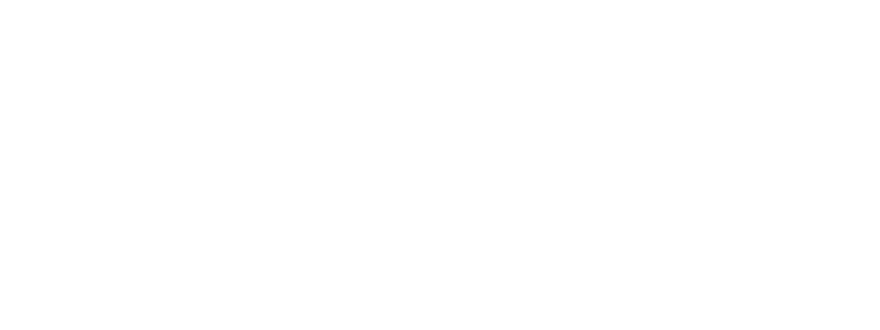

<IPython.core.display.Javascript object>


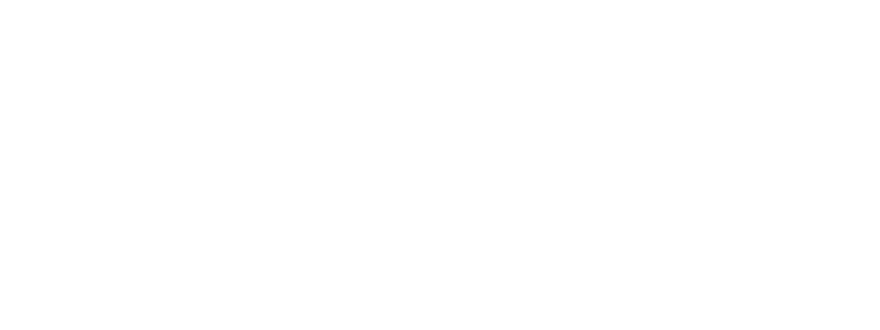

<IPython.core.display.Javascript object>


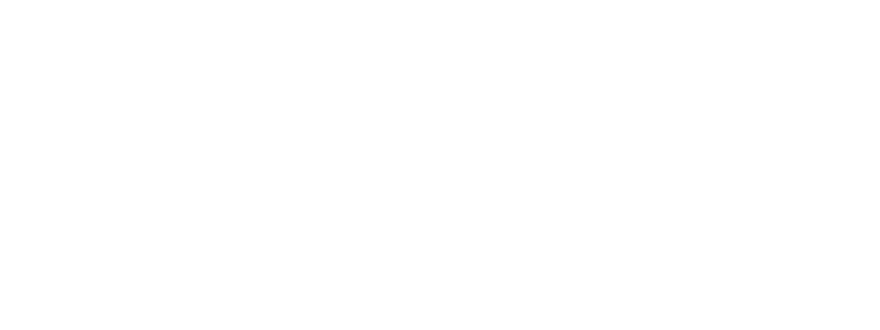

<IPython.core.display.Javascript object>


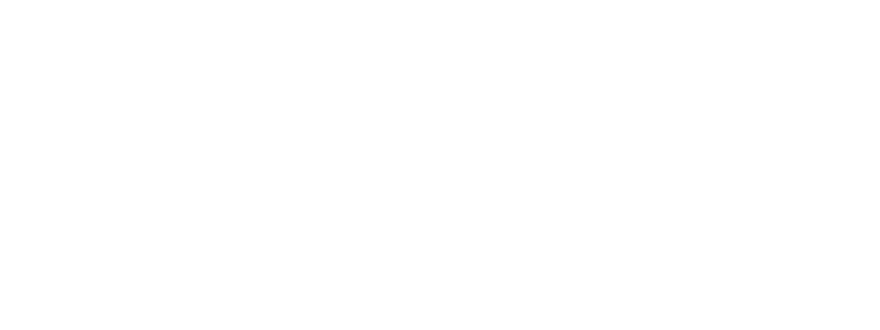

<IPython.core.display.Javascript object>


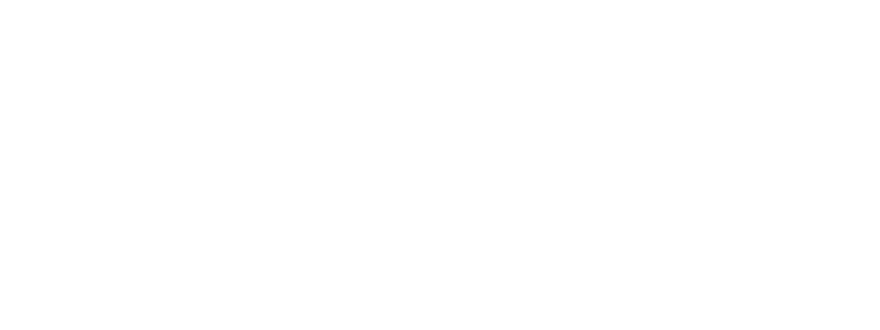

<IPython.core.display.Javascript object>


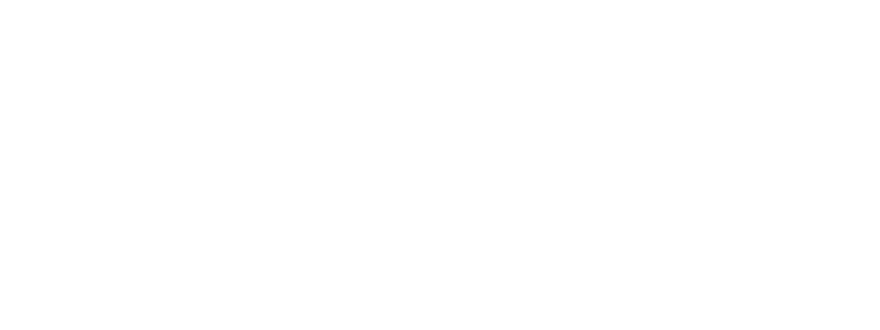

<IPython.core.display.Javascript object>


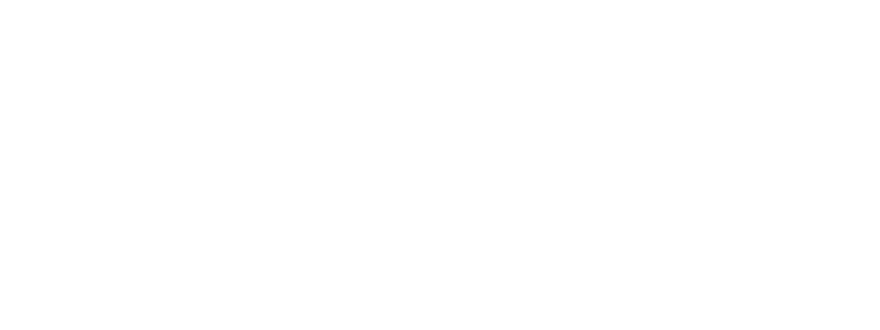

<IPython.core.display.Javascript object>


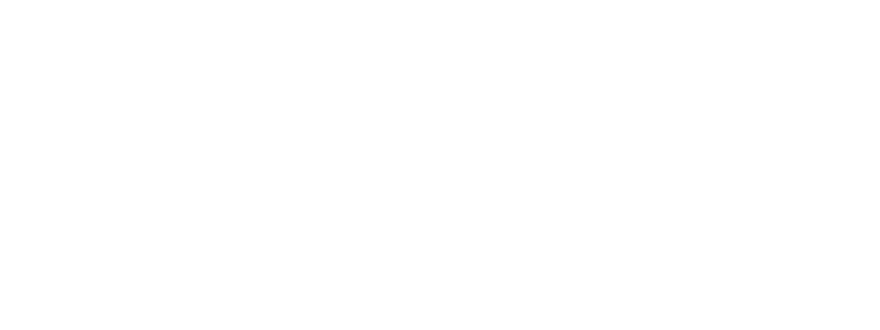

<IPython.core.display.Javascript object>


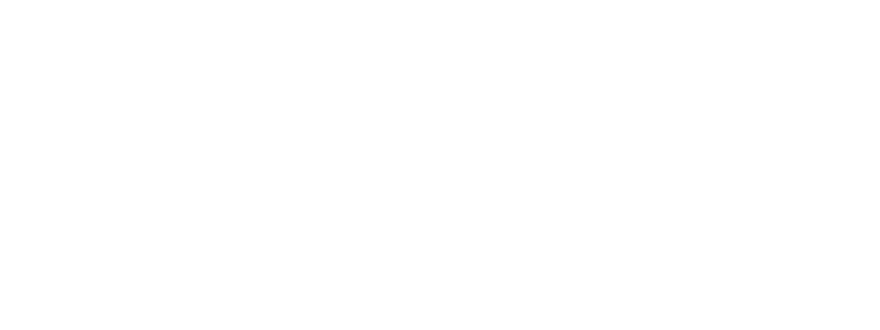

<IPython.core.display.Javascript object>


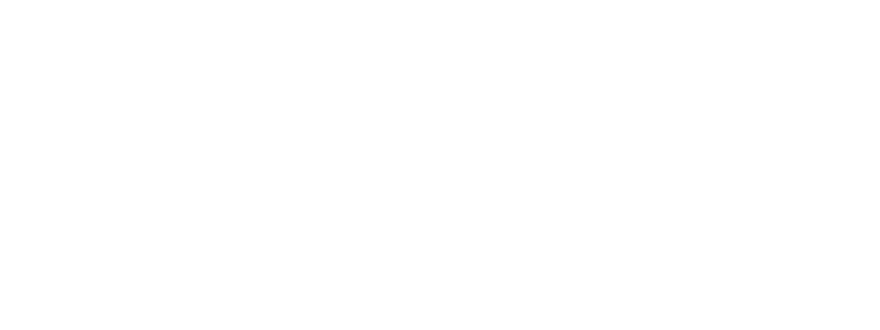

<IPython.core.display.Javascript object>


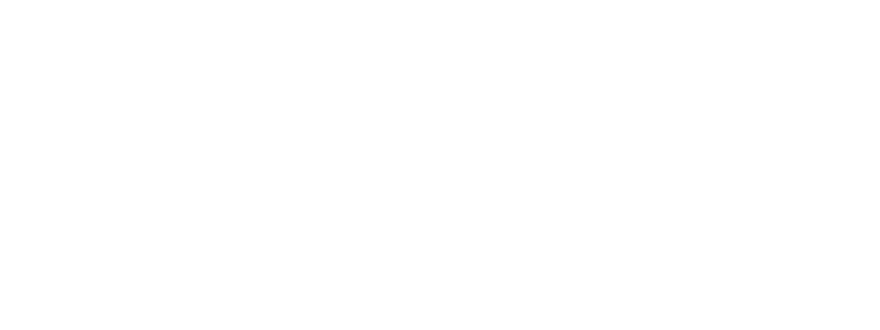

<IPython.core.display.Javascript object>


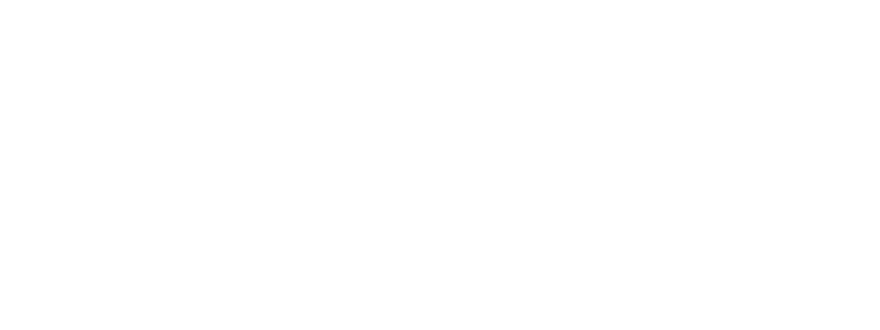

<IPython.core.display.Javascript object>


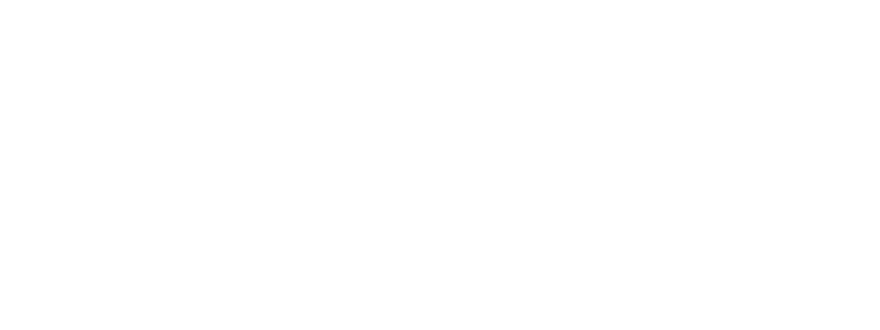

<IPython.core.display.Javascript object>


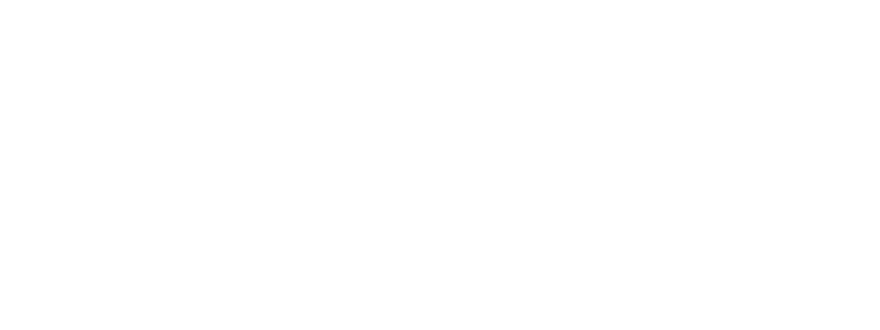

<IPython.core.display.Javascript object>


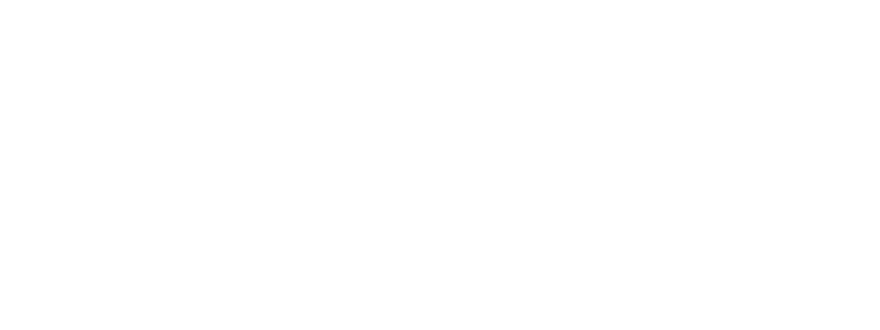

<IPython.core.display.Javascript object>


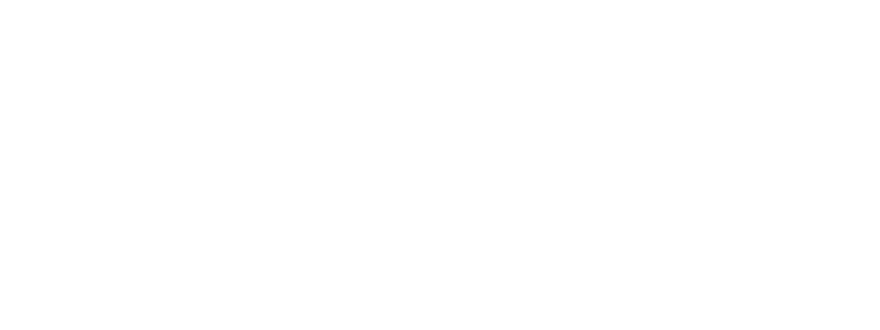

<IPython.core.display.Javascript object>


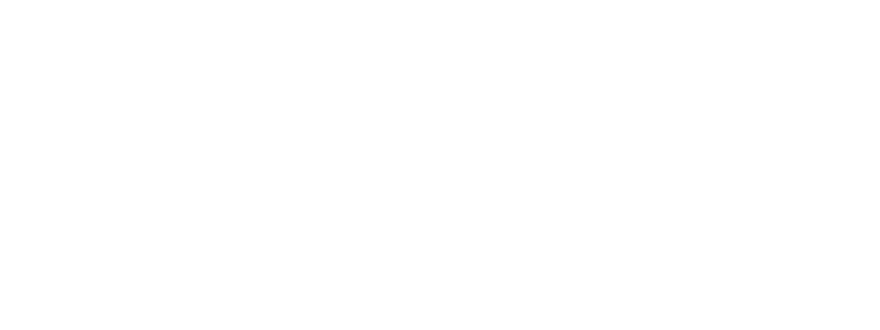

<IPython.core.display.Javascript object>


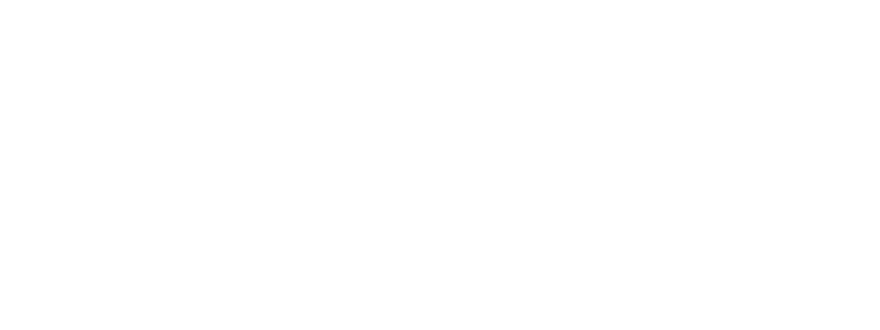

<IPython.core.display.Javascript object>


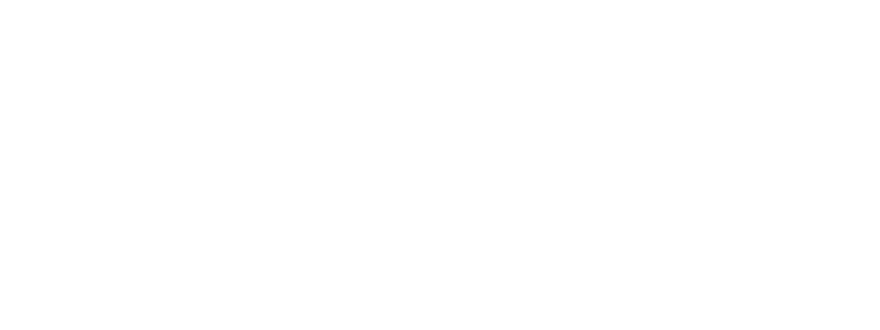

<IPython.core.display.Javascript object>


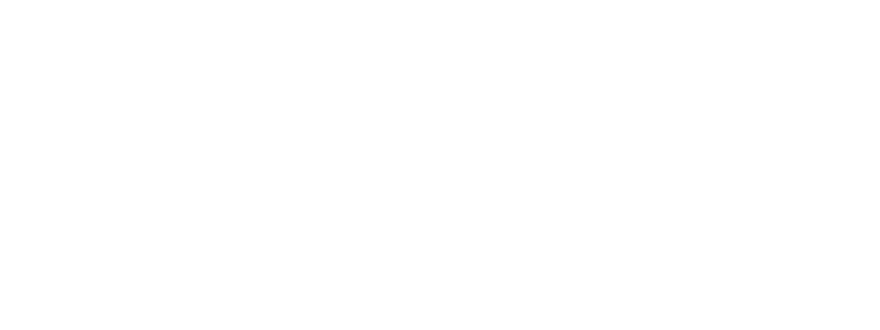

<IPython.core.display.Javascript object>


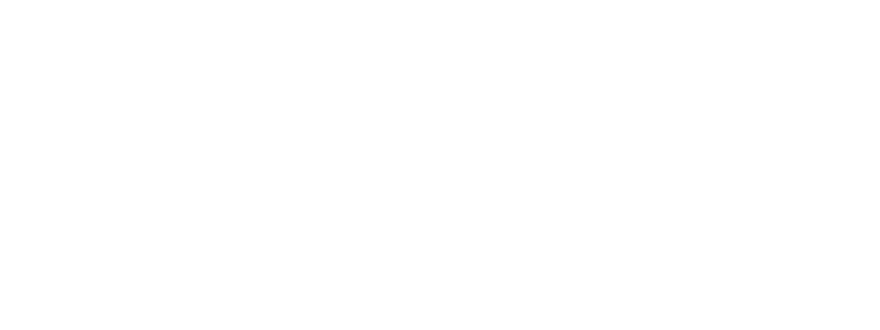

<IPython.core.display.Javascript object>


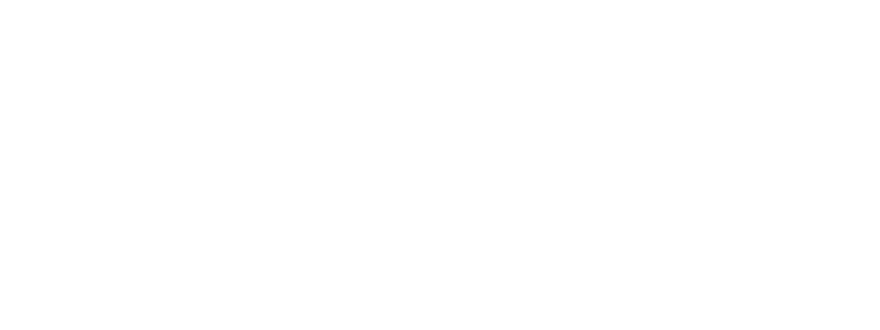

<IPython.core.display.Javascript object>


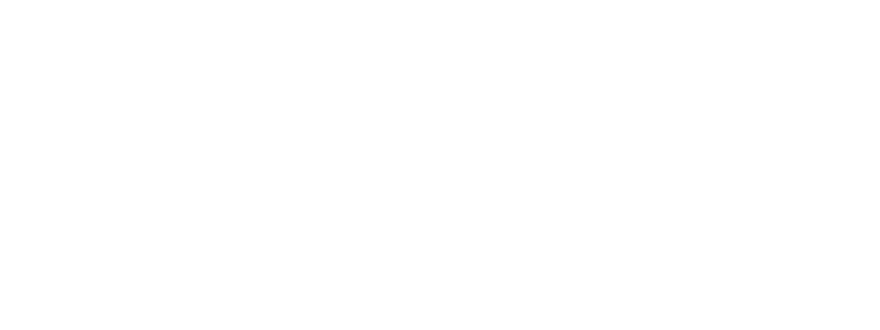

<IPython.core.display.Javascript object>


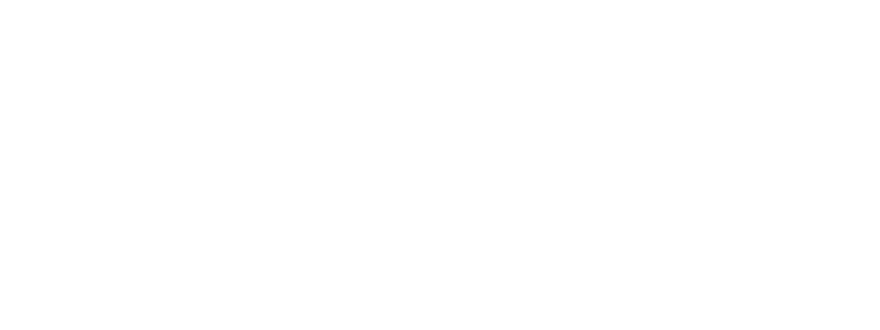

<IPython.core.display.Javascript object>


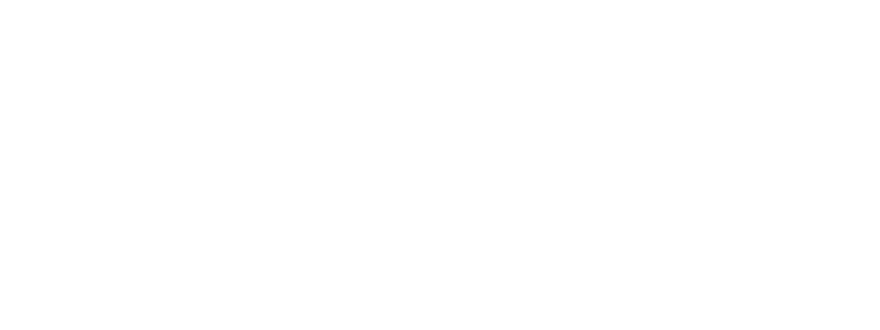

<IPython.core.display.Javascript object>


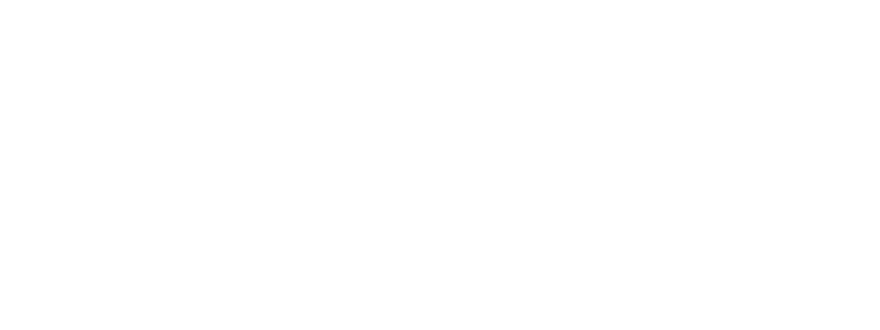

<IPython.core.display.Javascript object>


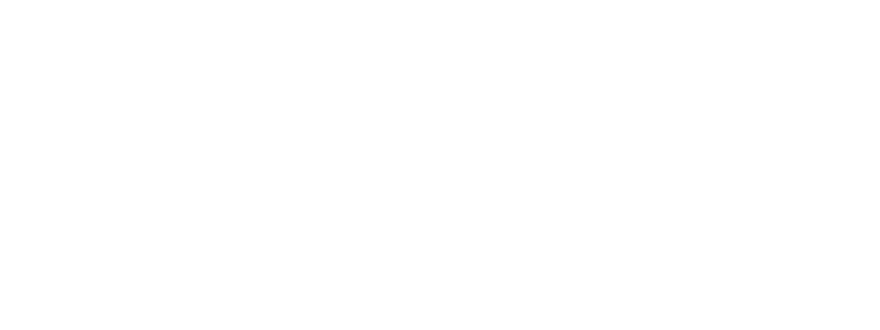

<IPython.core.display.Javascript object>


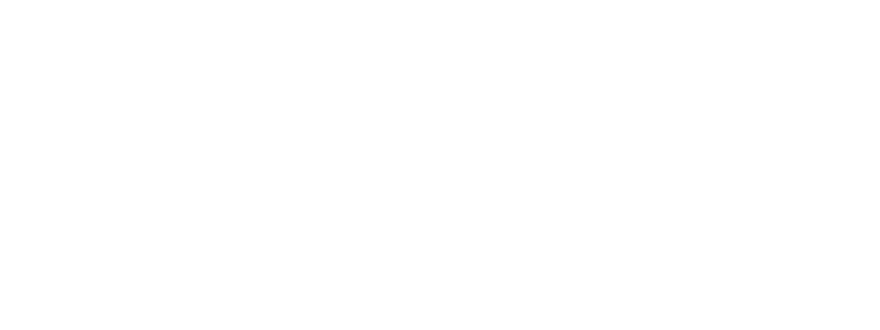

<IPython.core.display.Javascript object>


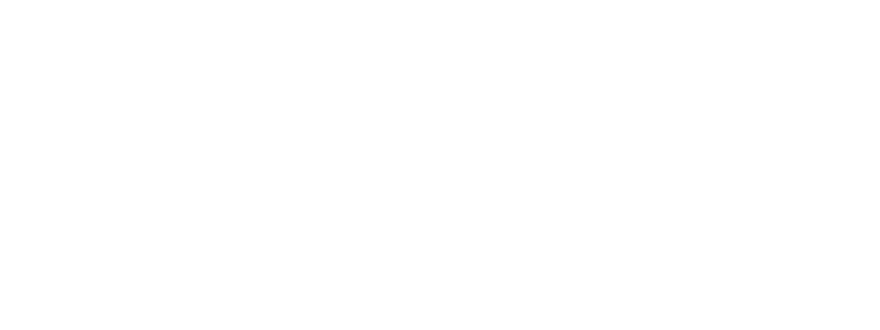

<IPython.core.display.Javascript object>


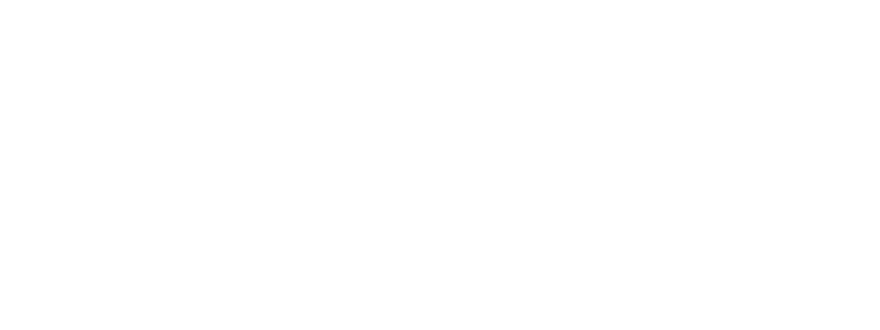

<IPython.core.display.Javascript object>


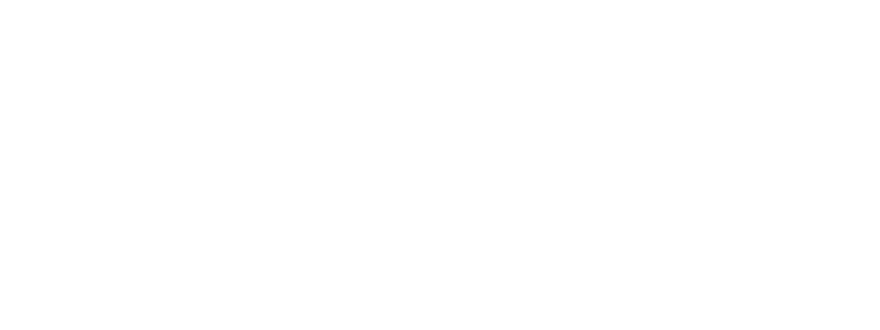

<IPython.core.display.Javascript object>


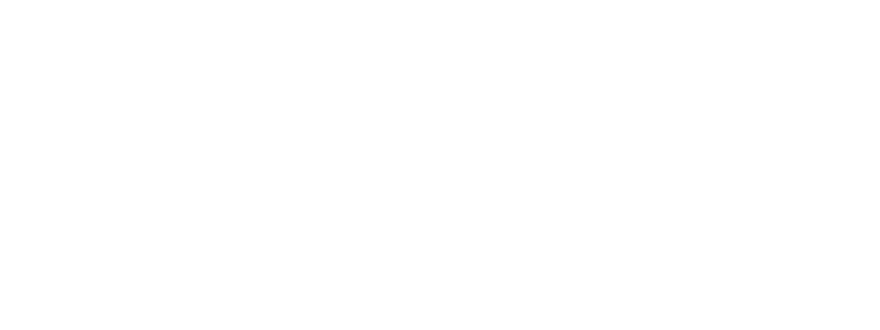

<IPython.core.display.Javascript object>


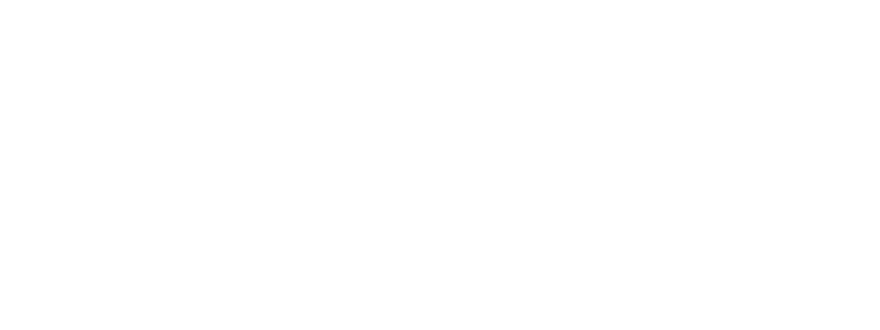

<IPython.core.display.Javascript object>


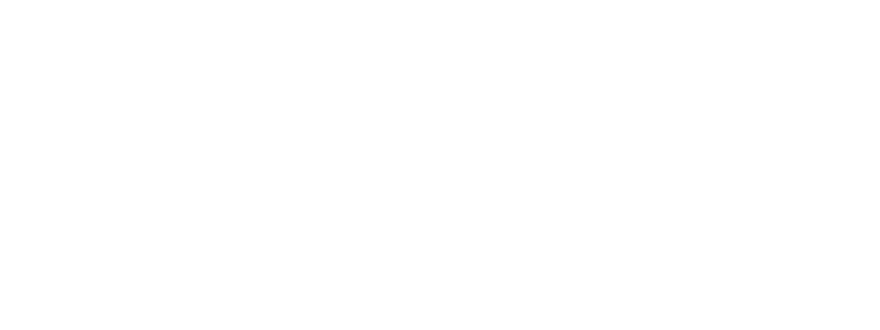

<IPython.core.display.Javascript object>


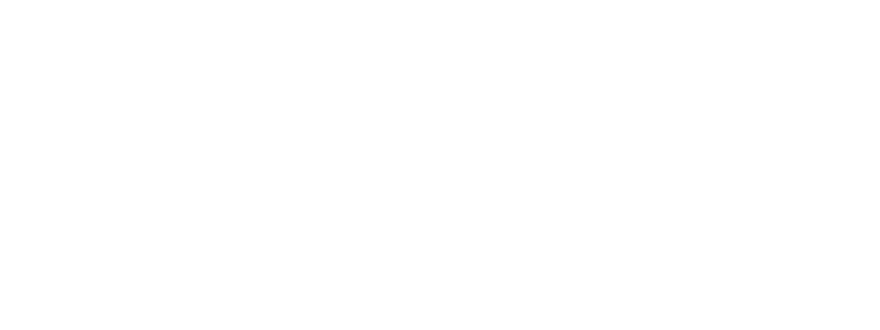

<IPython.core.display.Javascript object>


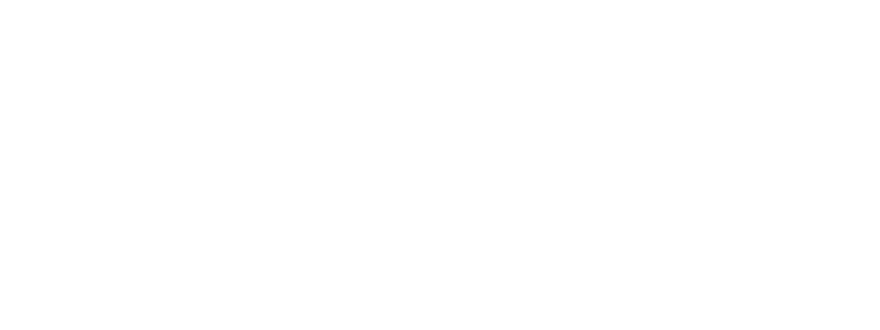

<IPython.core.display.Javascript object>


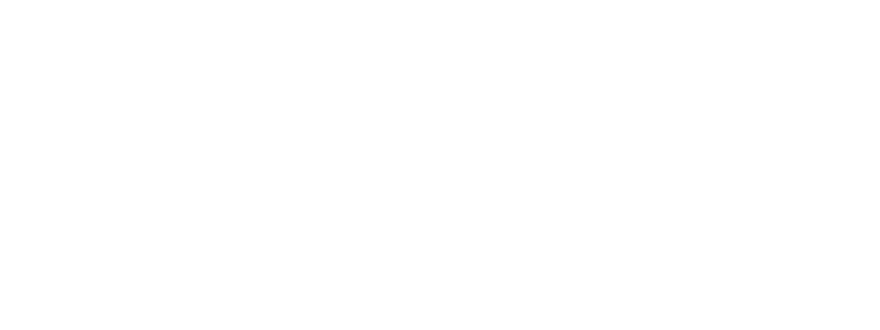

<IPython.core.display.Javascript object>


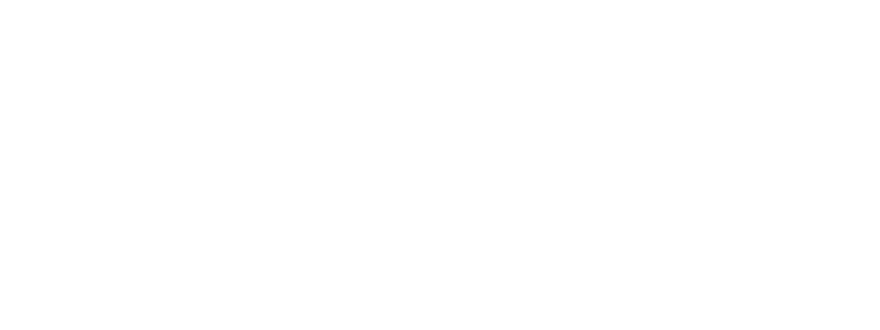

<IPython.core.display.Javascript object>


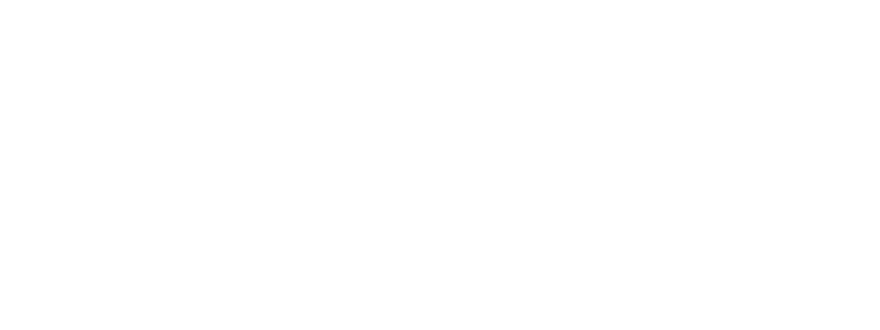

<IPython.core.display.Javascript object>


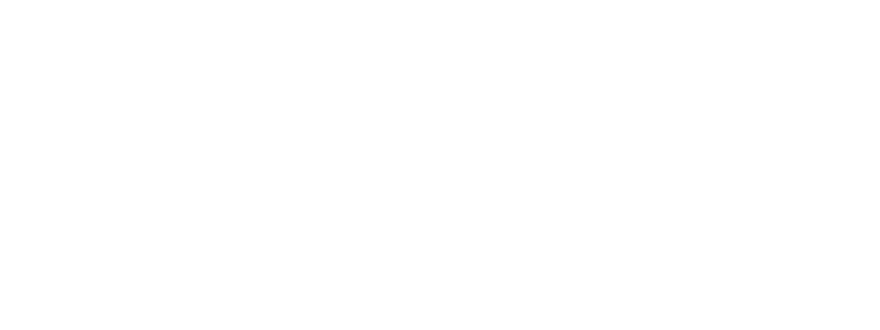

<IPython.core.display.Javascript object>


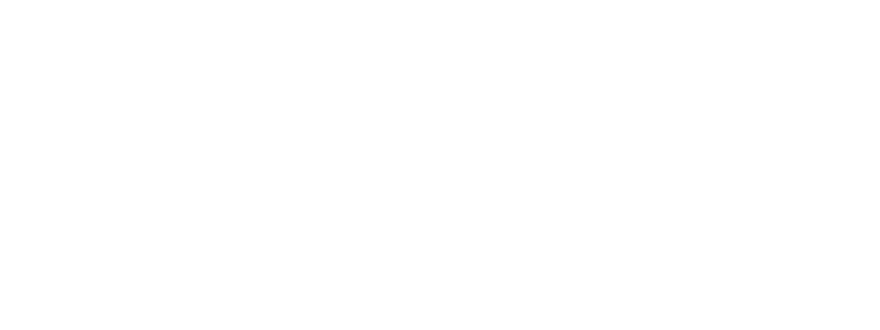

<IPython.core.display.Javascript object>


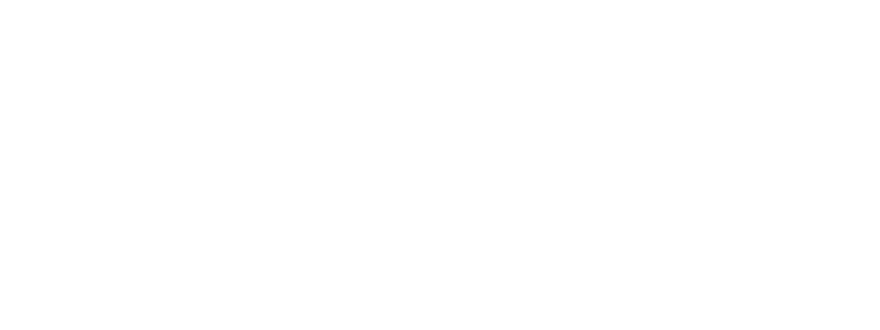

<IPython.core.display.Javascript object>


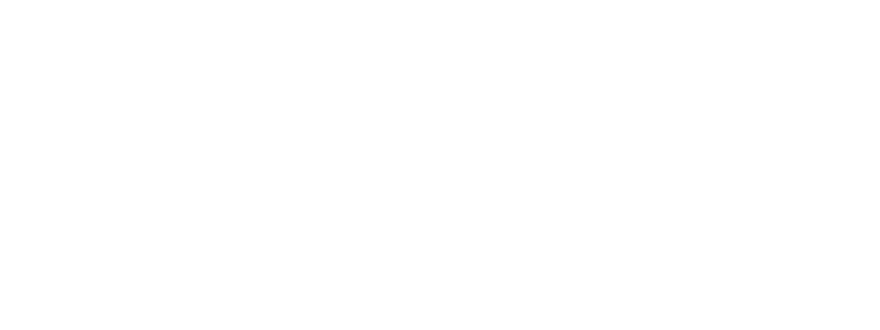

In [409]:
for roi in rmetrics.index.tolist():

    ymax = 0.2
    min_val, max_val = 0, 0

    n_transforms = len(transform_values)
    fig, axes = pl.subplots(1, len(transform_values), figsize=(8,3), sharex=True, sharey=True)

    cfg_str = rmetrics_by_cfg[rmetrics_by_cfg['cell']==roi].sort_values(by='response_pref').index[0]
    condkey = tuple([float(i) for i in cfg_str.split('-')[1::2]])
    currcfgs = bootresults[roi][condkey]['stimulus_configs']
    currlabels = exp.data.labels[exp.data.labels['config'].isin(currcfgs)]

    for cfg, g in currlabels.groupby(['config']):
        currv = exp.data.sdf[transform_param][cfg]
        plot_ix = transform_values.index(currv)

        if plot_trials:
            for trial, tdf in g.groupby(['trial']):
                tsec = tdf['tsec'].values
                tvals = dff_traces[roi][tdf.index].values
                st = temporal_downsample(tsec, windowsz) if smooth_traces else tsec
                sm = temporal_downsample(tvals, windowsz) if smooth_traces else tvals
                axes[plot_ix].plot(st, sm, color='k', alpha=0.3, lw=0.5)

                max_val = max([max_val, (sm).max() ])
                min_val = min( [min_val, (sm).min()])

            meantrace = np.nanmean(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
            sm = temporal_downsample(meantrace, windowsz) if smooth_traces else meantrace
            axes[plot_ix].plot(tsec, sm, color='k', alpha=1, lw=1)

        else:
            tsec =  np.nanmean(np.vstack(g.groupby(['trial'])['tsec'].apply(np.array).values), axis=0).astype(float)
            meantrace = np.nanmean(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
            semtrace = spstats.sem(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0, nan_policy='omit')

            st = temporal_downsample(tsec, windowsz) if smooth_traces else tsec
            sm = temporal_downsample(meantrace, windowsz) if smooth_traces else meantrace
            ss = temporal_downsample(semtrace, windowsz) if smooth_traces else semtrace

            axes[plot_ix].plot(st, sm, color=trace_color)
            axes[plot_ix].fill_between(st, sm+ss, sm-ss, color=trace_color, alpha=0.2)

            max_val = max([max_val, (sm+ss).max() ])
            min_val = min( [min_val, (sm-ss).min()])



    for ai, (ax, sz) in enumerate(zip(axes.flat, transform_values)):
        ax.set_title(int(sz))
        ax.set_ylim([min_val, max_val])
        ax.tick_params(which='both', axis='both', length=0)
        if ai == 0:
            ax.set_xticks([0, 1])
            ax.set_xticklabels([''])
            ax.set_xlabel('1 s')
            ax.set_yticks([0, ymax])
            ax.set_yticklabels([''])
            ax.set_ylabel('%.2f dF/F' % ymax)
            sns.despine(trim=True, ax=ax, offset=4)
        else:
            sns.despine(trim=True, ax=ax, offset=4, left=True, bottom=False)
            ax.set_yticklabels([''])
            ax.set_yticks([]) 
    pl.subplots_adjust(top=0.7, bottom=0.3, left=0.1)


    fig.suptitle('roi %i' % (int(roi+1)))
    label_figure(fig, data_id)
    pl.savefig(os.path.join(roidir, 'roi%05d.png' % int(roi+1)))
    pl.close()

# Plot by config

In [77]:
roidir2 = os.path.join(outdir, 'example-cells', '%s_%s_all-config' % (visual_area, skey))
if not os.path.exists(roidir2):
    os.makedirs(roidir2)
print roidir2

/n/coxfs01/julianarhee/aggregate-visual-areas/gratings-tuning/fit-dff_responsive-nstds-2.50-thr10.00_boot-1000-resample-20/example-cells/V1_JC097-20190616-FOV1_zoom2p0x-traces001_all-config


In [78]:
cfgs = [tuple(c) for c in fitparams['non_ori_configs']]
colors = sns.color_palette(palette='cubehelix', n_colors=len(cfgs))
    

In [79]:
rmetrics.index.tolist()

[24,
 38,
 48,
 64,
 79,
 90,
 91,
 93,
 96,
 121,
 123,
 134,
 137,
 142,
 146,
 147,
 148,
 165,
 169,
 172,
 176,
 178,
 187,
 193,
 207,
 211,
 238,
 243,
 250,
 254,
 256,
 268,
 285,
 319,
 355,
 384,
 388,
 389,
 390,
 411,
 418,
 423,
 428]

In [80]:
sdf = exp.data.sdf.copy()
#currcfgs = sdf[(sdf['sf']==condkey[0]) & (sdf['size']==condkey[1]) & (sdf['speed']==condkey[2])].index.tolist()


NameError: name 'condkey' is not defined

<IPython.core.display.Javascript object>


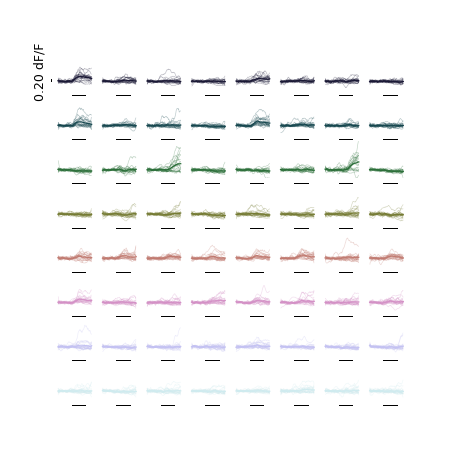

In [94]:
fig, axes = pl.subplots(len(cfg_values), len(transform_values), figsize=(5,5), sharex=False, sharey=True)

for ci, cfgv in enumerate(cfgs):
    condkey = cfgv #tuple([float(i) for i in cfgv.split('-')[1::2]])
    if condkey not in bootresults[roi].keys():
        currcfgs = sdf[(sdf['sf']==condkey[0]) & (sdf['size']==condkey[1]) & (sdf['speed']==condkey[2])].index.tolist()
    else:
        currcfgs = bootresults[roi][condkey]['stimulus_configs']
    currlabels = exp.data.labels[exp.data.labels['config'].isin(currcfgs)]
    si = cfgs.index(condkey)
    currcolor = colors[si]

    for cfg, g in currlabels.groupby(['config']):
        currv = exp.data.sdf[transform_param][cfg]
        plot_ix = transform_values.index(currv)

        ax = axes[plot_ix] if len(cfg_values)==1 else axes[ci, plot_ix]

        if plot_trials:
            for trial, tdf in g.groupby(['trial']):
                tsec = tdf['tsec'].values
                tvals = dff_traces[roi][tdf.index].values
                st = temporal_downsample(tsec, windowsz) if smooth_traces else tsec
                sm = temporal_downsample(tvals, windowsz) if smooth_traces else tvals
                ax.plot(st, sm, color=currcolor, alpha=0.3, lw=0.5)

                max_val = max([max_val, (sm).max() ])
                min_val = min( [min_val, (sm).min()])

            meantrace = np.nanmean(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
            sm = temporal_downsample(meantrace, windowsz) if smooth_traces else meantrace
            ax.plot(tsec, sm, color=currcolor, alpha=1, lw=1)

        else:
            tsec =  np.nanmean(np.vstack(g.groupby(['trial'])['tsec'].apply(np.array).values), axis=0).astype(float)
            meantrace = np.nanmean(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
            semtrace = spstats.sem(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0, nan_policy='omit')

            st = temporal_downsample(tsec, windowsz) if smooth_traces else tsec
            sm = temporal_downsample(meantrace, windowsz) if smooth_traces else meantrace
            ss = temporal_downsample(semtrace, windowsz) if smooth_traces else semtrace

            ax.plot(st, sm, color=currcolor)
            ax.fill_between(st, sm+ss, sm-ss, color=currcolor, alpha=0.2)
            ax.plot([0, 0], [1, 0], 'k', lw=2)
            ax.set_xticklabels([''])
            max_val = max([max_val, (sm+ss).max() ])
            min_val = min( [min_val, (sm-ss).min()])

for ai, ax in enumerate(axes.flat):
    ax.set_ylim([min_val, max_val])
    ax.tick_params(which='both', axis='both', length=0)
    if ai == 0:
        ax.set_xticks([0, 1])
        ax.set_xticklabels([''])
        ax.set_xlabel('1 s')
        ax.set_yticks([0, ymax])
        ax.set_yticklabels([''])
        ax.set_ylabel('%.2f dF/F' % ymax)
        sns.despine(trim=True, ax=ax, offset=4)
    else:
        ax.set_yticklabels([''])
        ax.set_yticks([]) 
        ax.set_xticks([0, 1])
        ax.set_xticklabels([''])
        sns.despine(trim=True, ax=ax, offset=4, left=True, bottom=False)
        
    #ax.plot()
#pl.subplots_adjust(top=0.8, bottom=0.2, left=0.1, right=0.8,hspace=-.1, wspace=0.01)



<IPython.core.display.Javascript object>


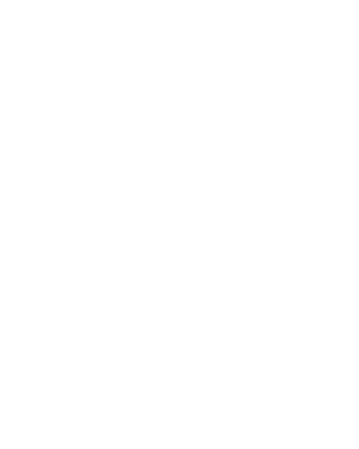

<IPython.core.display.Javascript object>


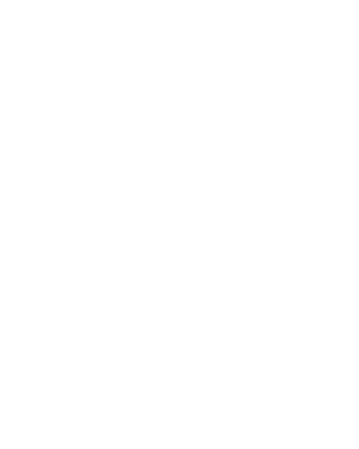

<IPython.core.display.Javascript object>


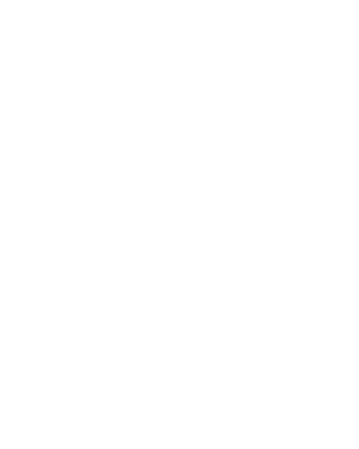

<IPython.core.display.Javascript object>


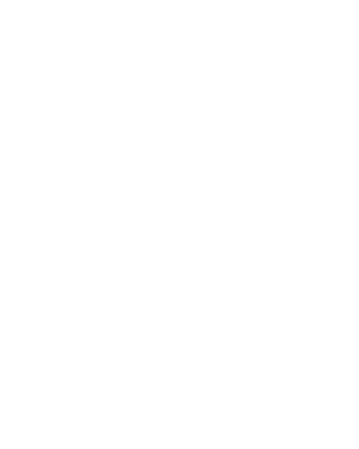

<IPython.core.display.Javascript object>


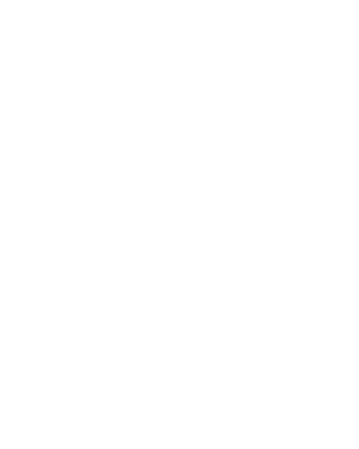

<IPython.core.display.Javascript object>


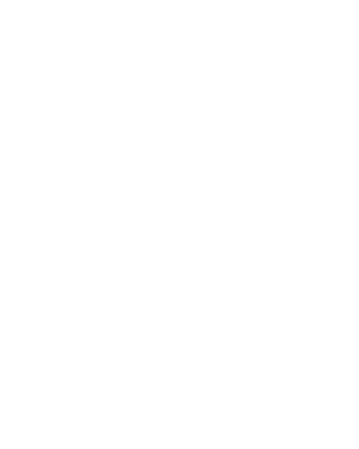

<IPython.core.display.Javascript object>


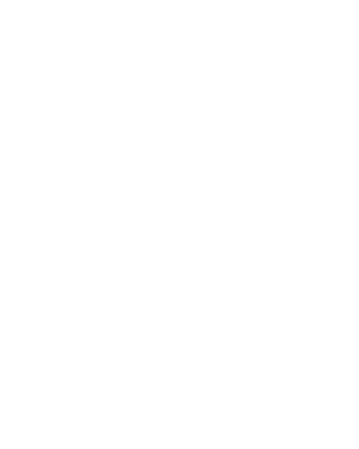

<IPython.core.display.Javascript object>


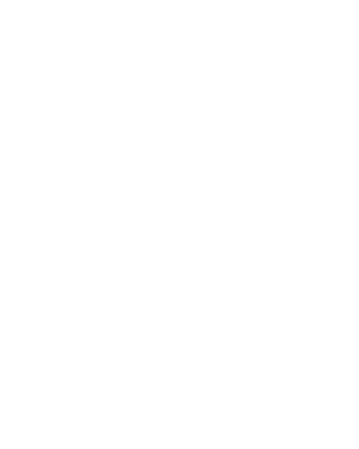

<IPython.core.display.Javascript object>


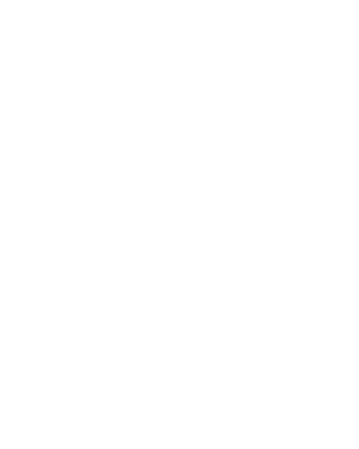

<IPython.core.display.Javascript object>


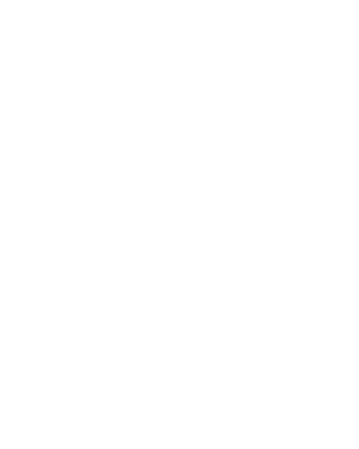

<IPython.core.display.Javascript object>


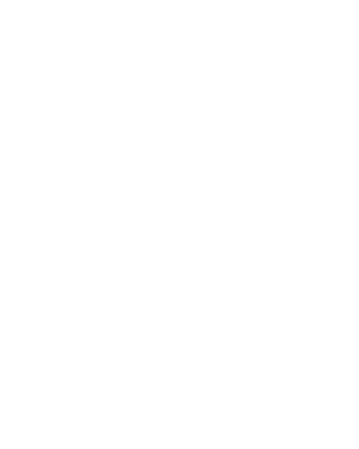

<IPython.core.display.Javascript object>


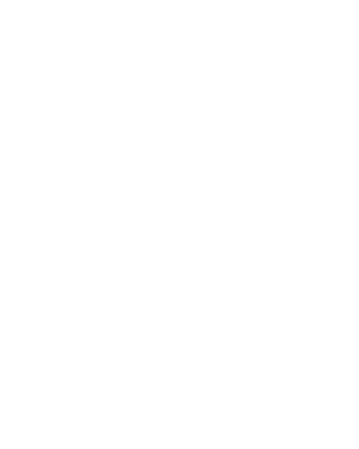

<IPython.core.display.Javascript object>


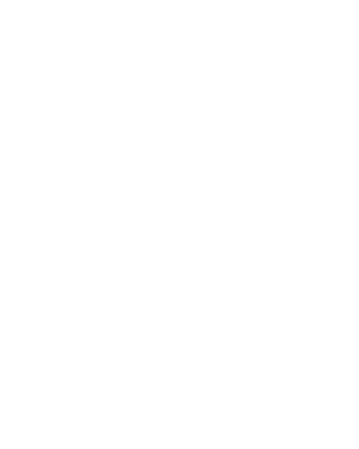

<IPython.core.display.Javascript object>


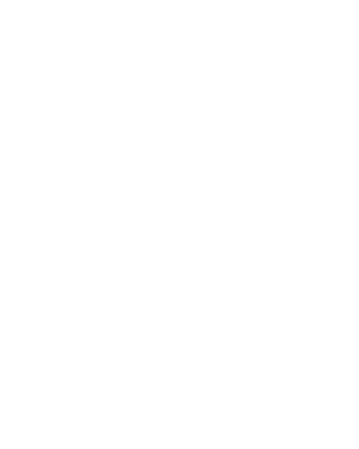

<IPython.core.display.Javascript object>


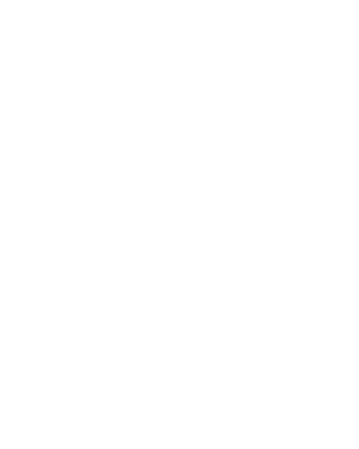

<IPython.core.display.Javascript object>


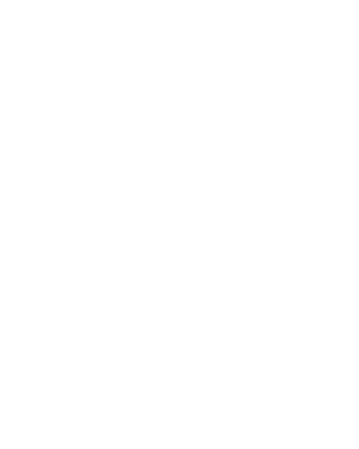

<IPython.core.display.Javascript object>


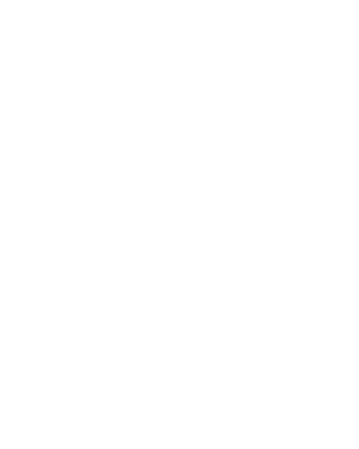

<IPython.core.display.Javascript object>


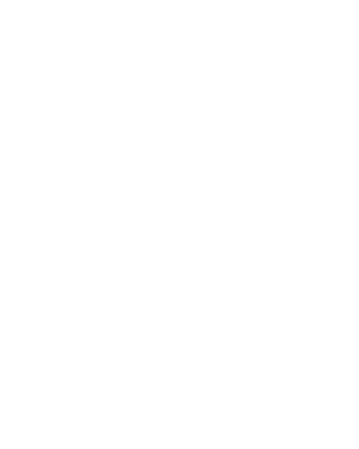

<IPython.core.display.Javascript object>


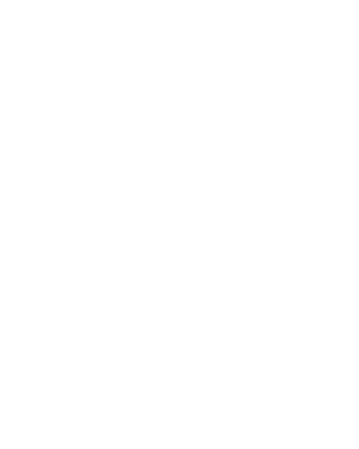

<IPython.core.display.Javascript object>


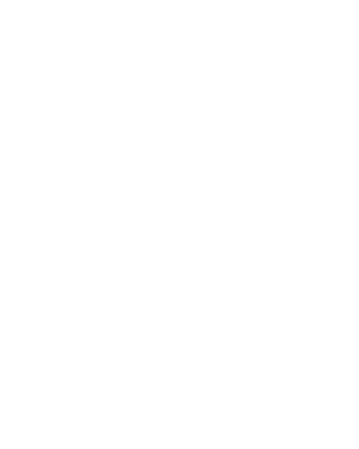

<IPython.core.display.Javascript object>


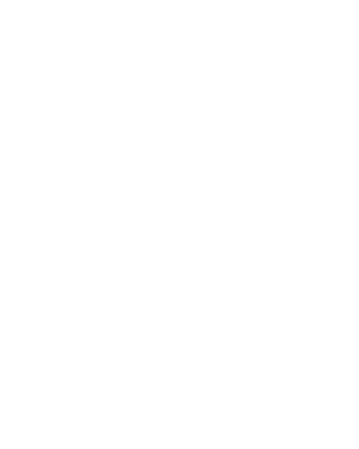

<IPython.core.display.Javascript object>


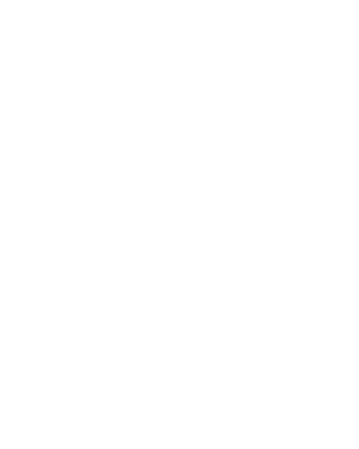

<IPython.core.display.Javascript object>


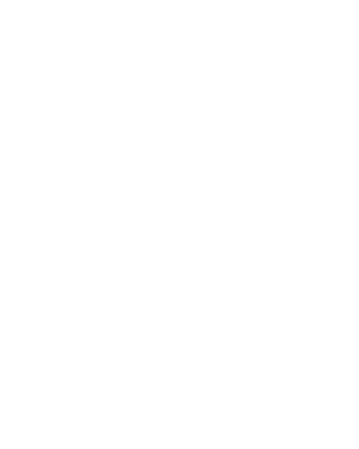

<IPython.core.display.Javascript object>


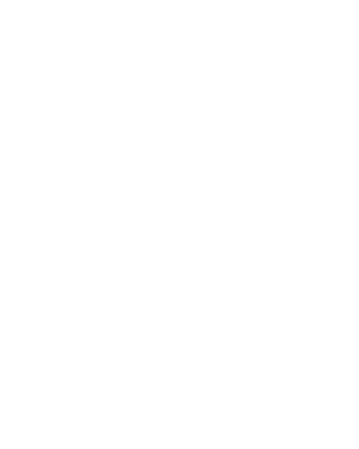

<IPython.core.display.Javascript object>


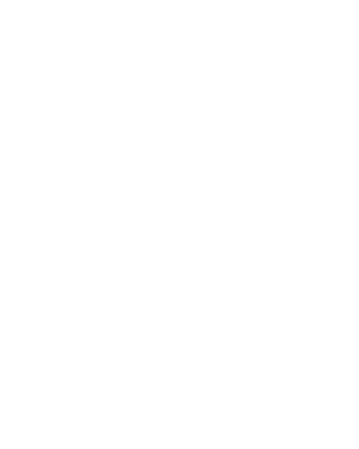

<IPython.core.display.Javascript object>


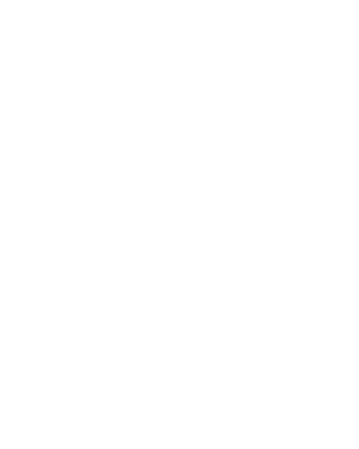

<IPython.core.display.Javascript object>


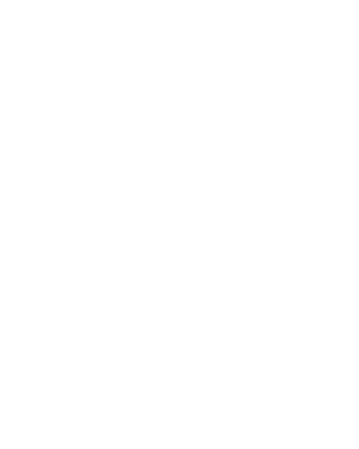

<IPython.core.display.Javascript object>


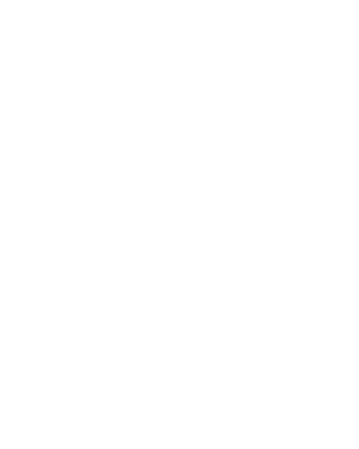

<IPython.core.display.Javascript object>


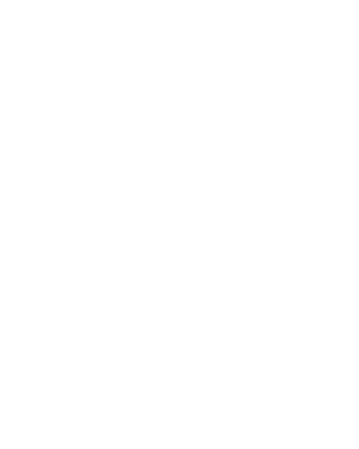

<IPython.core.display.Javascript object>


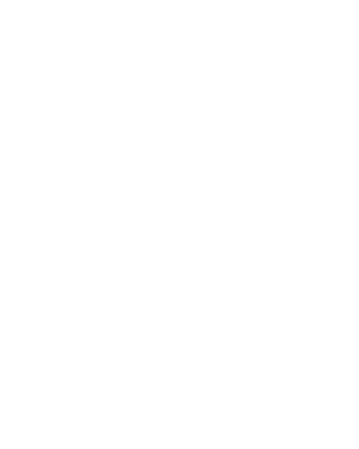

<IPython.core.display.Javascript object>


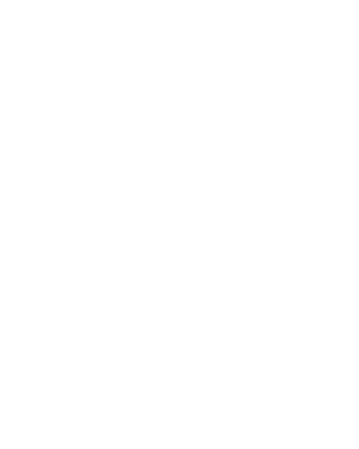

<IPython.core.display.Javascript object>


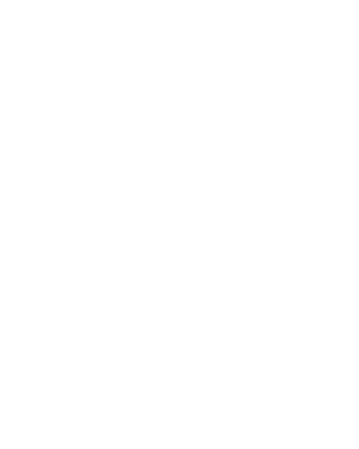

<IPython.core.display.Javascript object>


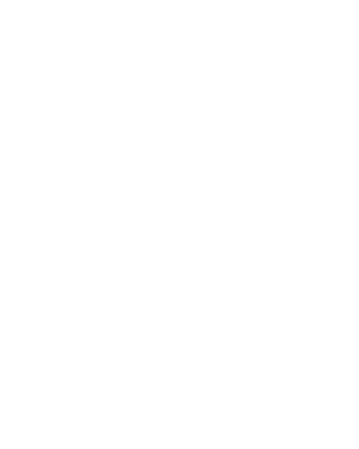

<IPython.core.display.Javascript object>


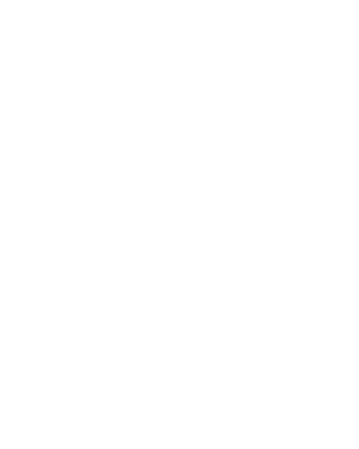

<IPython.core.display.Javascript object>


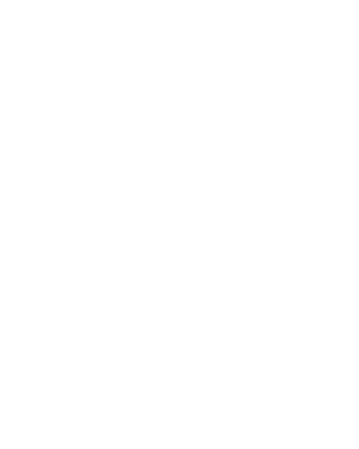

<IPython.core.display.Javascript object>


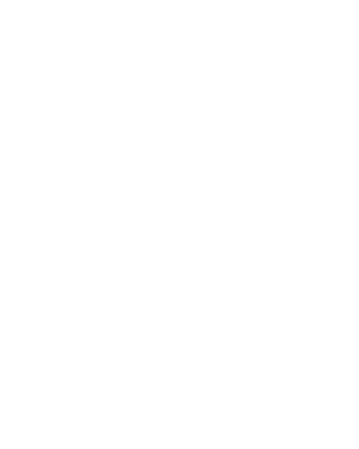

<IPython.core.display.Javascript object>


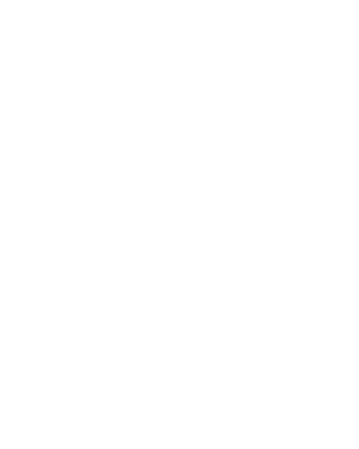

<IPython.core.display.Javascript object>


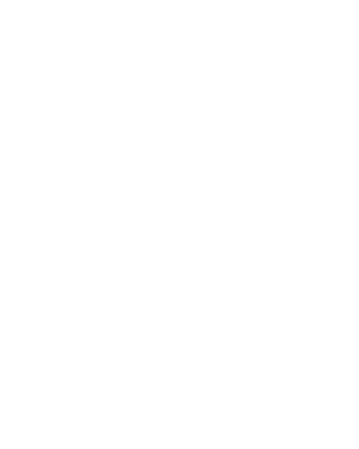

<IPython.core.display.Javascript object>


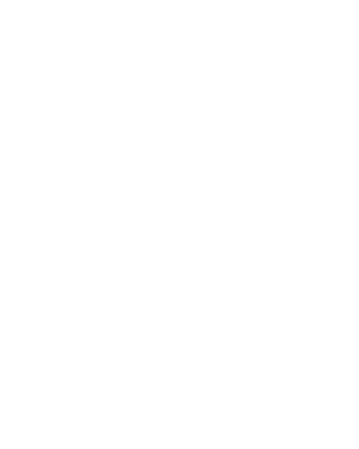

<IPython.core.display.Javascript object>


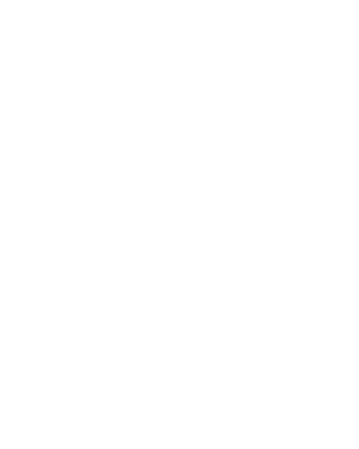

<IPython.core.display.Javascript object>


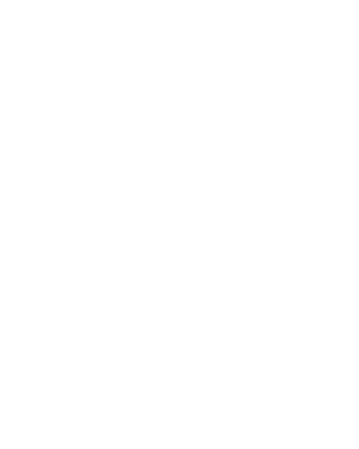

<IPython.core.display.Javascript object>


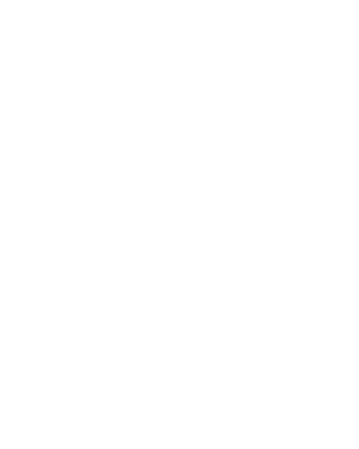

<IPython.core.display.Javascript object>


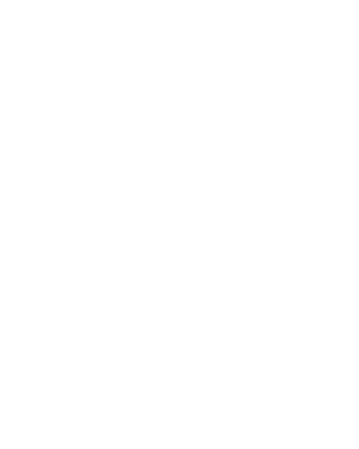

In [96]:
for roi in rmetrics.index.tolist():
    
    ymax = 0.2
    min_val, max_val = 0, 0

    n_transforms = len(transform_values)

    cfg_values = cfgs #rmetrics_by_cfg[rmetrics_by_cfg['cell']==roi].index.tolist()
    fig, axes = pl.subplots(len(cfg_values), len(transform_values), figsize=(4,5), sharex=True, sharey=True)

    for ci, cfgv in enumerate(cfgs):
        condkey = cfgv #tuple([float(i) for i in cfgv.split('-')[1::2]])
        if condkey not in bootresults[roi].keys():
            currcfgs = sdf[(sdf['sf']==condkey[0]) & (sdf['size']==condkey[1]) & (sdf['speed']==condkey[2])].index.tolist()
        else:
            currcfgs = bootresults[roi][condkey]['stimulus_configs']
        currlabels = exp.data.labels[exp.data.labels['config'].isin(currcfgs)]
        si = cfgs.index(condkey)
        currcolor = colors[si]

        for cfg, g in currlabels.groupby(['config']):
            currv = exp.data.sdf[transform_param][cfg]
            plot_ix = transform_values.index(currv)
            
            ax = axes[plot_ix] if len(cfg_values)==1 else axes[ci, plot_ix]
            
            if plot_trials:
                for trial, tdf in g.groupby(['trial']):
                    tsec = tdf['tsec'].values
                    tvals = dff_traces[roi][tdf.index].values
                    st = temporal_downsample(tsec, windowsz) if smooth_traces else tsec
                    sm = temporal_downsample(tvals, windowsz) if smooth_traces else tvals
                    ax.plot(st, sm, color=currcolor, alpha=0.3, lw=0.5)

                    max_val = max([max_val, (sm).max() ])
                    min_val = min( [min_val, (sm).min()])

                meantrace = np.nanmean(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
                sm = temporal_downsample(meantrace, windowsz) if smooth_traces else meantrace
                ax.plot(tsec, sm, color=currcolor, alpha=1, lw=1)

            else:
                tsec =  np.nanmean(np.vstack(g.groupby(['trial'])['tsec'].apply(np.array).values), axis=0).astype(float)
                meantrace = np.nanmean(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
                semtrace = spstats.sem(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0, nan_policy='omit')

                st = temporal_downsample(tsec, windowsz) if smooth_traces else tsec
                sm = temporal_downsample(meantrace, windowsz) if smooth_traces else meantrace
                ss = temporal_downsample(semtrace, windowsz) if smooth_traces else semtrace

                ax.plot(st, sm, color=currcolor)
                ax.fill_between(st, sm+ss, sm-ss, color=currcolor, alpha=0.2)

                max_val = max([max_val, (sm+ss).max() ])
                min_val = min( [min_val, (sm-ss).min()])

    for ai, ax in enumerate(axes.flat):
        ax.set_ylim([min_val, max_val])
        ax.tick_params(which='both', axis='both', length=0)
        if ai == 0:
            ax.set_xticks([0, 1])
            ax.set_xticklabels([''])
            ax.set_xlabel('1 s')
            ax.set_yticks([0, ymax])
            ax.set_yticklabels([''])
            ax.set_ylabel('%.2f dF/F' % ymax)
            sns.despine(trim=True, ax=ax, offset=4)
        else:
            sns.despine(trim=True, ax=ax, offset=4, left=True, bottom=False)
            ax.set_yticklabels([''])
            ax.set_yticks([]) 
    pl.subplots_adjust(top=0.8, bottom=0.2, left=0.1, right=0.8,hspace=0., wspace=0.01)


    fig.suptitle('roi %i' % (int(roi+1)))
    label_figure(fig, data_id)
    pl.savefig(os.path.join(roidir2, 'roi%05d.svg' % int(roi+1)))
    pl.close()


In [41]:
roi = 11

<IPython.core.display.Javascript object>


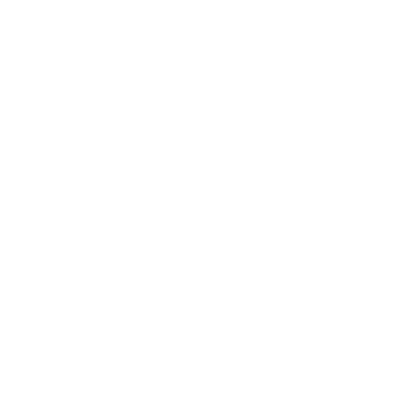

In [42]:

ymax = 0.2
min_val, max_val = 0, 0

n_transforms = len(transform_values)

cfg_values = cfgs #rmetrics_by_cfg[rmetrics_by_cfg['cell']==roi].index.tolist()
fig, axes = pl.subplots(len(cfg_values), len(transform_values), figsize=(5,5), sharex=True, sharey=True)

for ci, cfgv in enumerate(cfgs):
    condkey = cfgv #tuple([float(i) for i in cfgv.split('-')[1::2]])
    if condkey not in bootresults[roi].keys():
        currcfgs = sdf[(sdf['sf']==condkey[0]) & (sdf['size']==condkey[1]) & (sdf['speed']==condkey[2])].index.tolist()
    else:
        currcfgs = bootresults[roi][condkey]['stimulus_configs']
    currlabels = exp.data.labels[exp.data.labels['config'].isin(currcfgs)]
    si = cfgs.index(condkey)
    currcolor = colors[si]

    for cfg, g in currlabels.groupby(['config']):
        currv = exp.data.sdf[transform_param][cfg]
        plot_ix = transform_values.index(currv)

        ax = axes[plot_ix] if len(cfg_values)==1 else axes[ci, plot_ix]

        if plot_trials:
            for trial, tdf in g.groupby(['trial']):
                tsec = tdf['tsec'].values
                tvals = dff_traces[roi][tdf.index].values
                st = temporal_downsample(tsec, windowsz) if smooth_traces else tsec
                sm = temporal_downsample(tvals, windowsz) if smooth_traces else tvals
                ax.plot(st, sm, color=currcolor, alpha=0.3, lw=0.5)

                max_val = max([max_val, (sm).max() ])
                min_val = min( [min_val, (sm).min()])

            meantrace = np.nanmean(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
            sm = temporal_downsample(meantrace, windowsz) if smooth_traces else meantrace
            ax.plot(tsec, sm, color=currcolor, alpha=1, lw=1)

        else:
            tsec =  np.nanmean(np.vstack(g.groupby(['trial'])['tsec'].apply(np.array).values), axis=0).astype(float)
            meantrace = np.nanmean(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
            semtrace = spstats.sem(np.array([dff_traces[roi][gg.index] for trial, gg in g.groupby(['trial'])]), axis=0, nan_policy='omit')

            st = temporal_downsample(tsec, windowsz) if smooth_traces else tsec
            sm = temporal_downsample(meantrace, windowsz) if smooth_traces else meantrace
            ss = temporal_downsample(semtrace, windowsz) if smooth_traces else semtrace

            ax.plot(st, sm, color=currcolor)
            ax.fill_between(st, sm+ss, sm-ss, color=currcolor, alpha=0.2)

            max_val = max([max_val, (sm+ss).max() ])
            min_val = min( [min_val, (sm-ss).min()])

for ai, ax in enumerate(axes.flat):
    ax.set_ylim([min_val, max_val])
    ax.tick_params(which='both', axis='both', length=0)
    if ai == 0:
        ax.set_xticks([0, 1])
        ax.set_xticklabels([''])
        ax.set_xlabel('1 s')
        ax.set_yticks([0, ymax])
        ax.set_yticklabels([''])
        ax.set_ylabel('%.2f dF/F' % ymax)
        sns.despine(trim=True, ax=ax, offset=4)
    else:
        sns.despine(trim=True, ax=ax, offset=4, left=True, bottom=False)
        ax.set_yticklabels([''])
        ax.set_yticks([]) 
pl.subplots_adjust(top=0.8, bottom=0.2, left=0.1, right=0.8,hspace=-.1, wspace=0.01)


fig.suptitle('roi %i' % (int(roi+1)))
label_figure(fig, data_id)
pl.savefig(os.path.join(roidir2, 'roi%05d.png' % int(roi+1)))
pl.close()

In [748]:
rmetrics_by_cfg['response_pref'].max()

0.3466120905834134

<IPython.core.display.Javascript object>


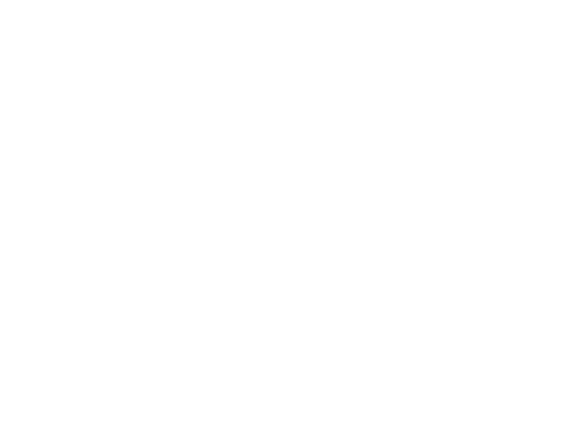

<IPython.core.display.Javascript object>


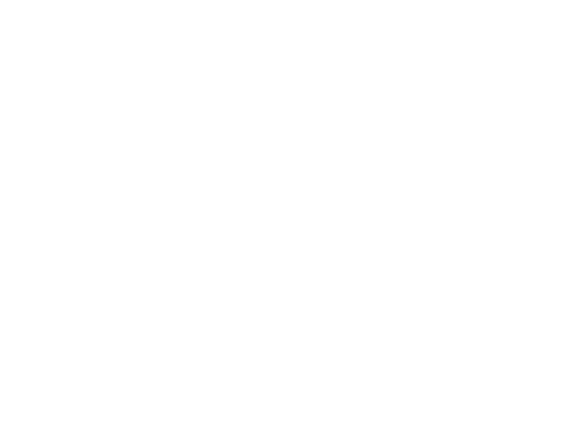

<IPython.core.display.Javascript object>


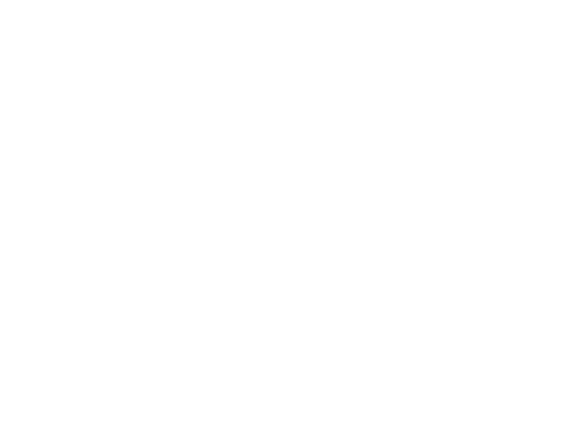

<IPython.core.display.Javascript object>


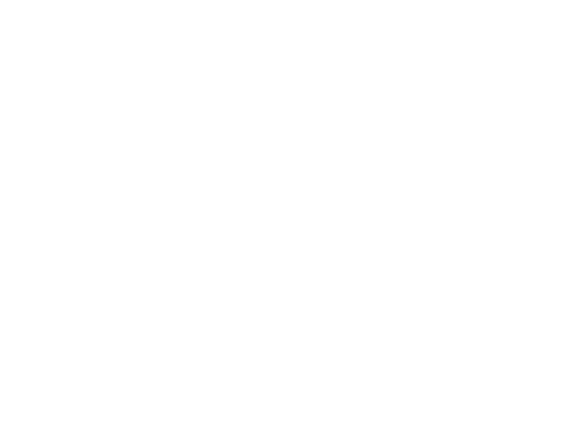

<IPython.core.display.Javascript object>


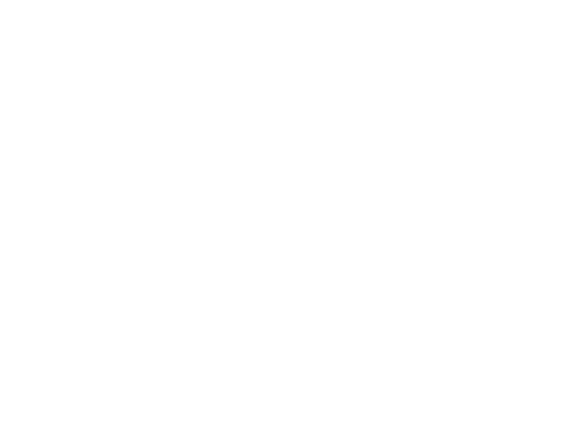

<IPython.core.display.Javascript object>


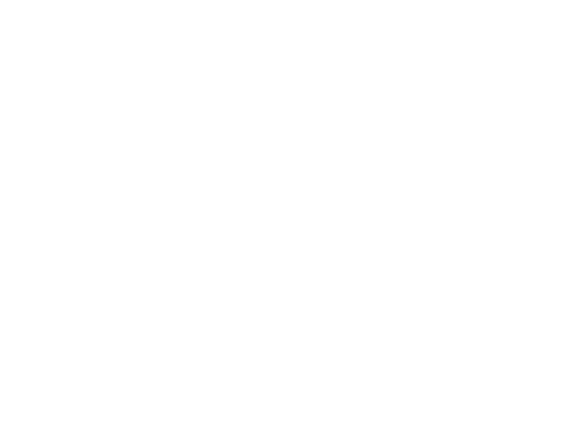

<IPython.core.display.Javascript object>


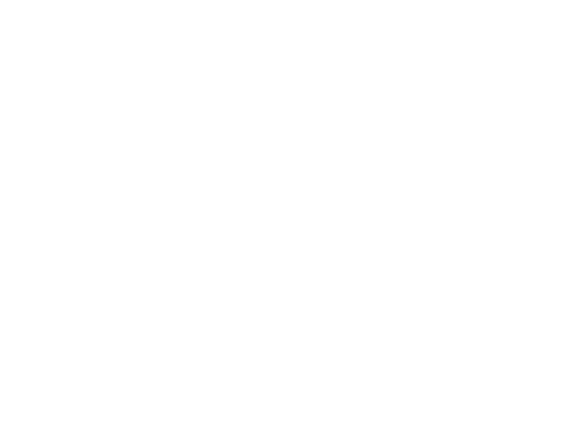

<IPython.core.display.Javascript object>


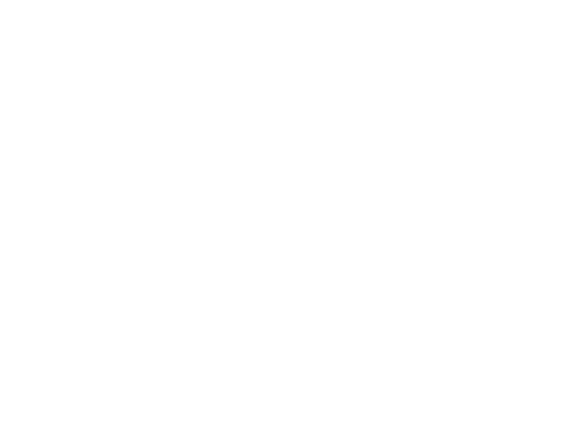

<IPython.core.display.Javascript object>


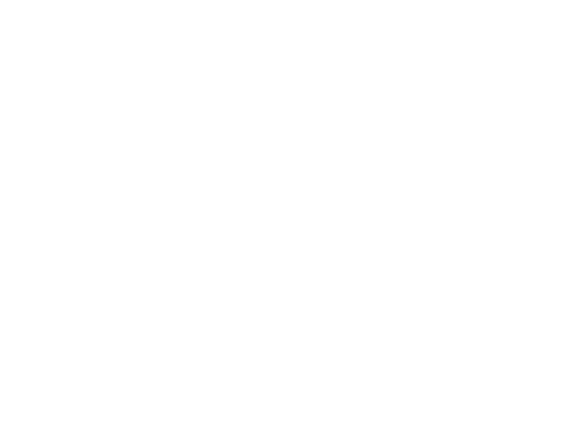

<IPython.core.display.Javascript object>


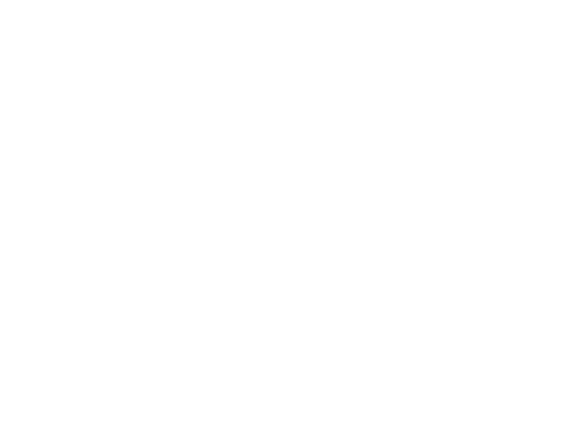

<IPython.core.display.Javascript object>


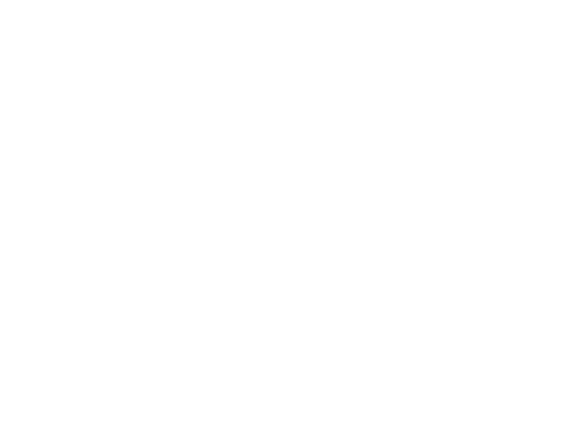

<IPython.core.display.Javascript object>


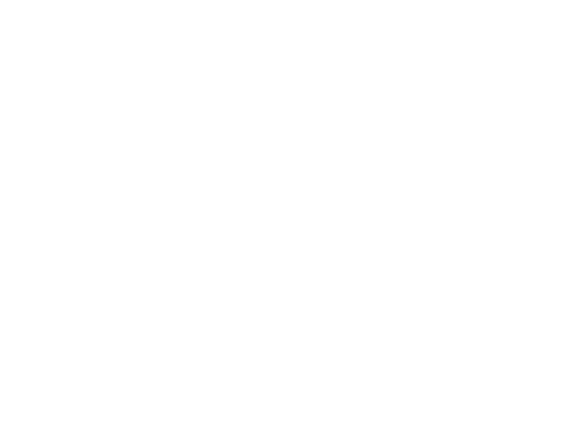

<IPython.core.display.Javascript object>


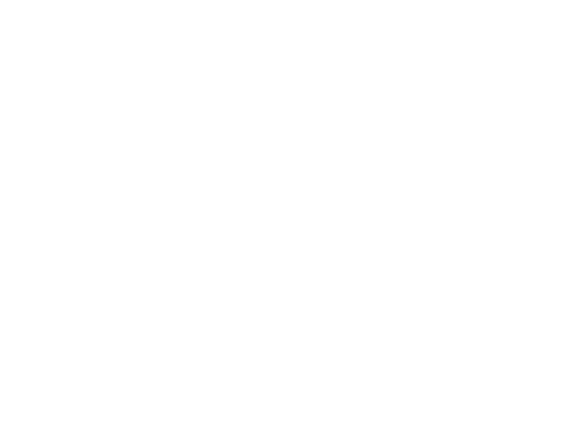

<IPython.core.display.Javascript object>


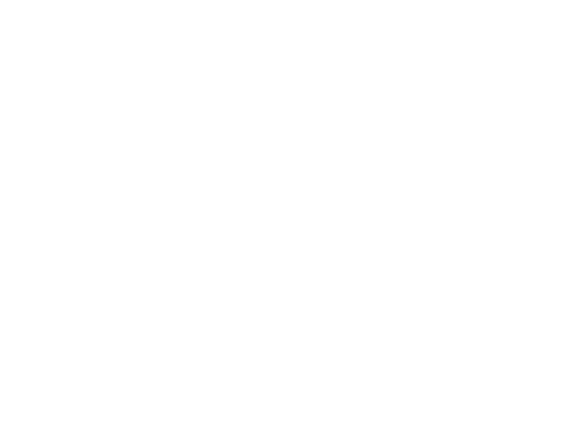

<IPython.core.display.Javascript object>


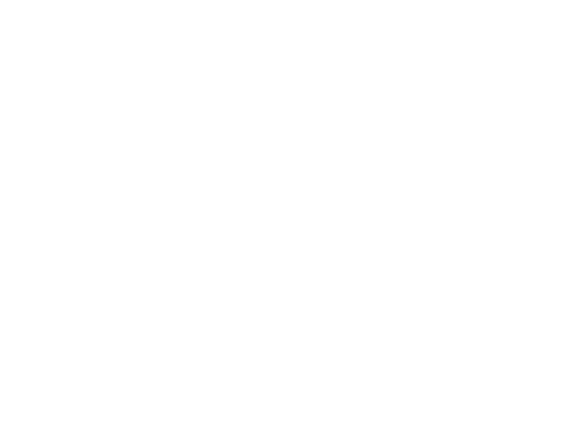

<IPython.core.display.Javascript object>


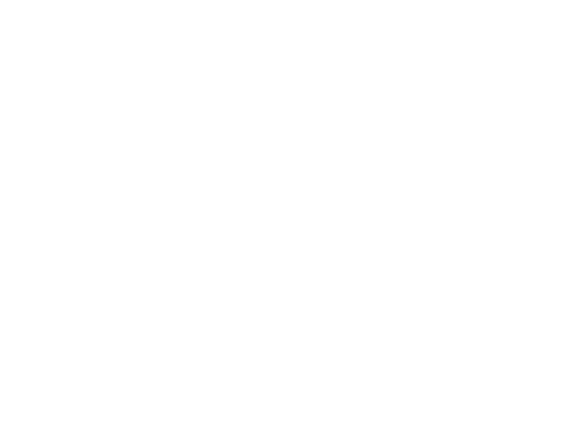

<IPython.core.display.Javascript object>


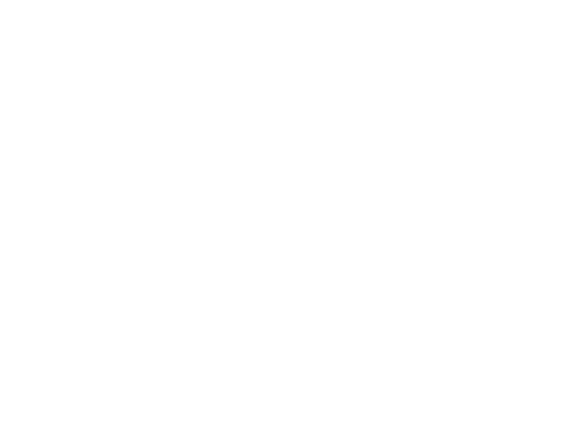

<IPython.core.display.Javascript object>


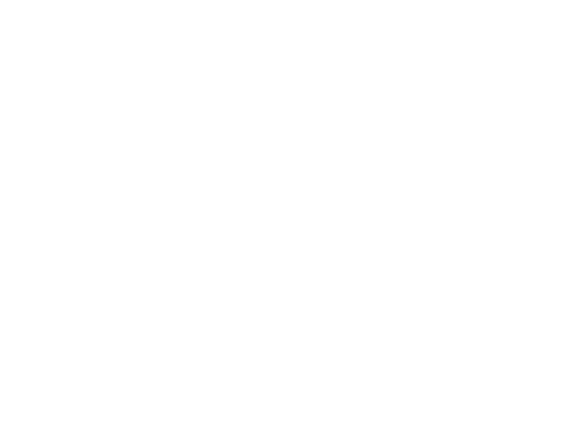

<IPython.core.display.Javascript object>


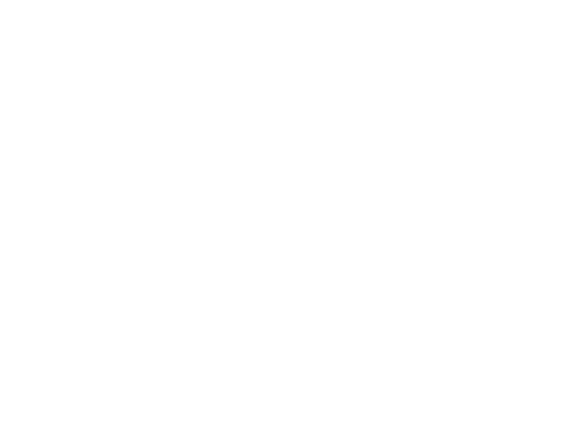

<IPython.core.display.Javascript object>


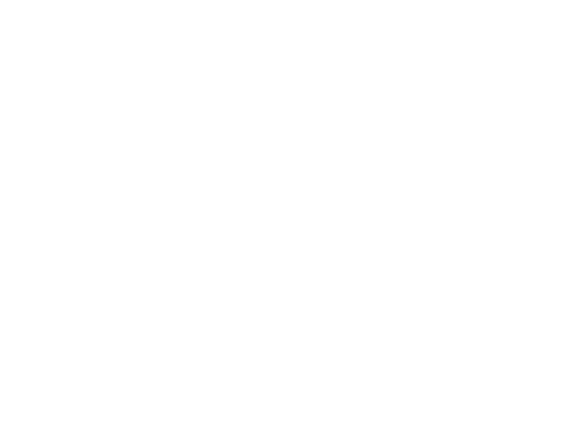

<IPython.core.display.Javascript object>


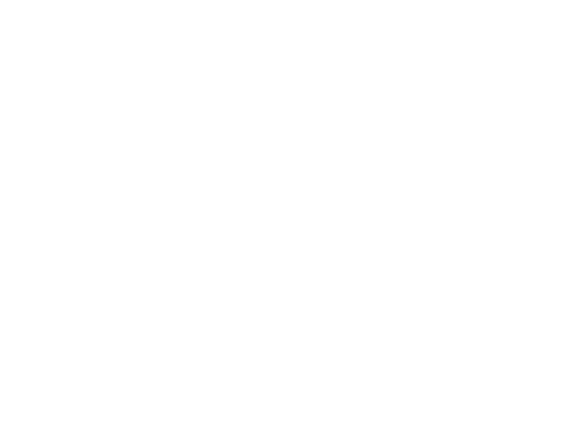

<IPython.core.display.Javascript object>


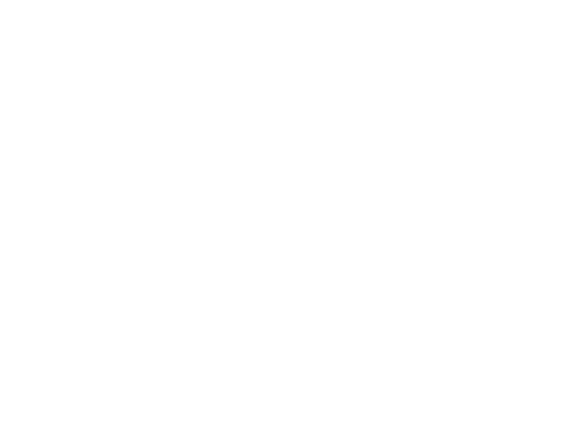

<IPython.core.display.Javascript object>


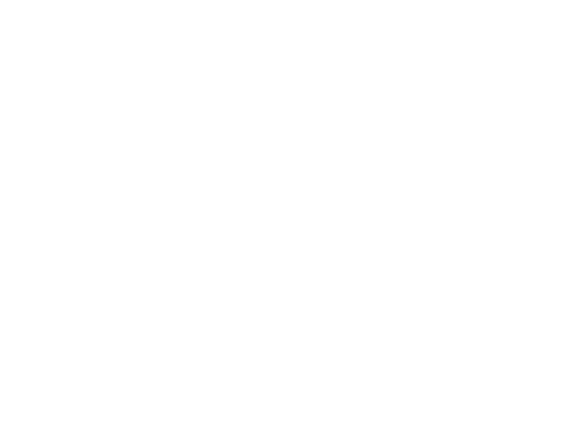

<IPython.core.display.Javascript object>


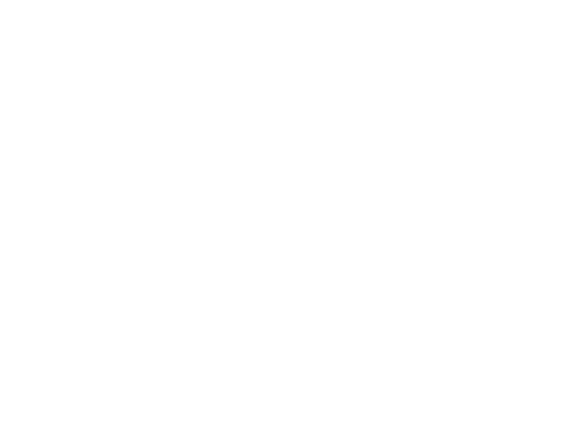

<IPython.core.display.Javascript object>


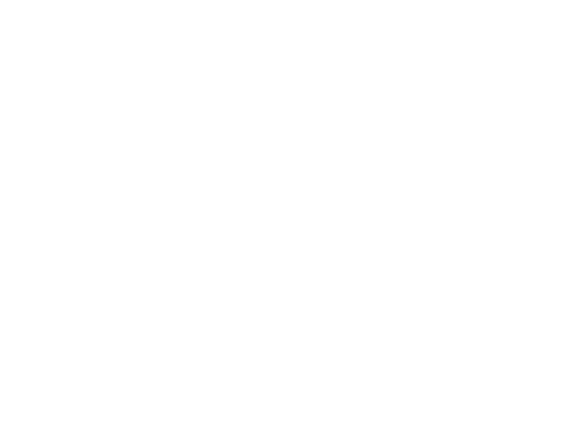

<IPython.core.display.Javascript object>


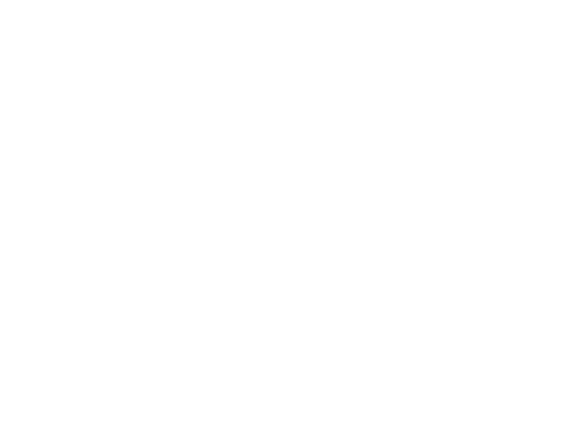

<IPython.core.display.Javascript object>


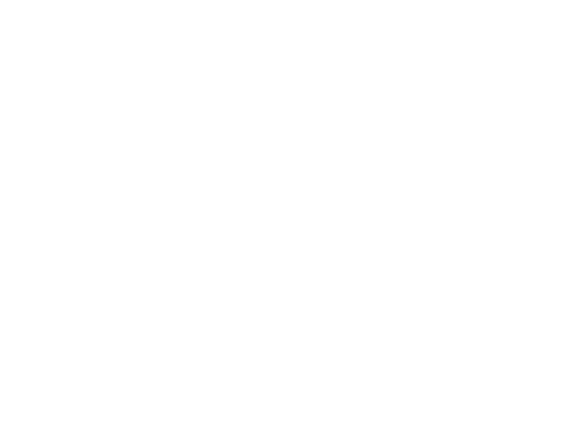

<IPython.core.display.Javascript object>


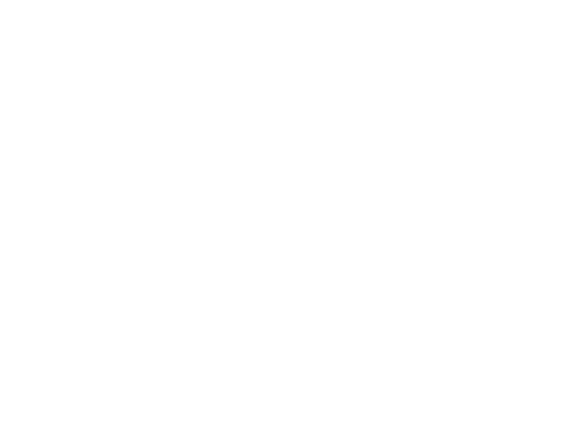

<IPython.core.display.Javascript object>


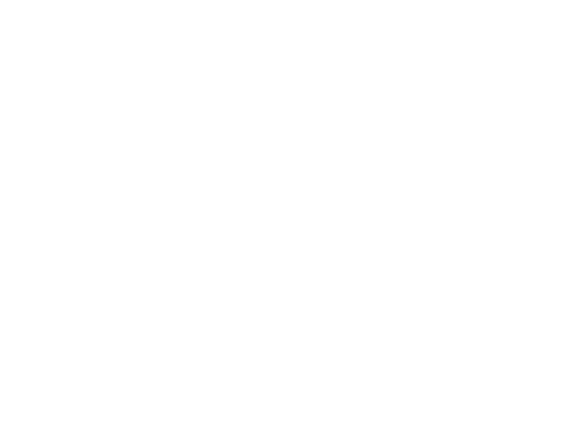

<IPython.core.display.Javascript object>


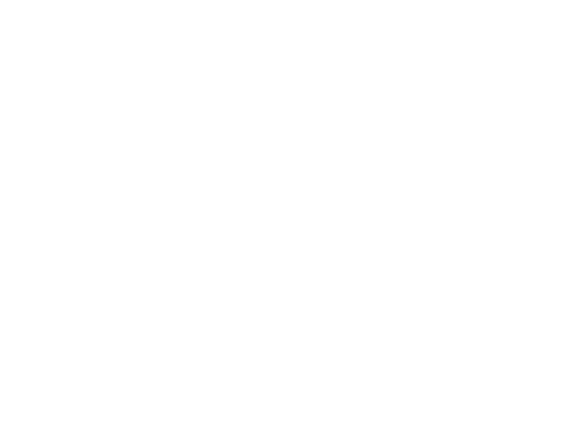

<IPython.core.display.Javascript object>


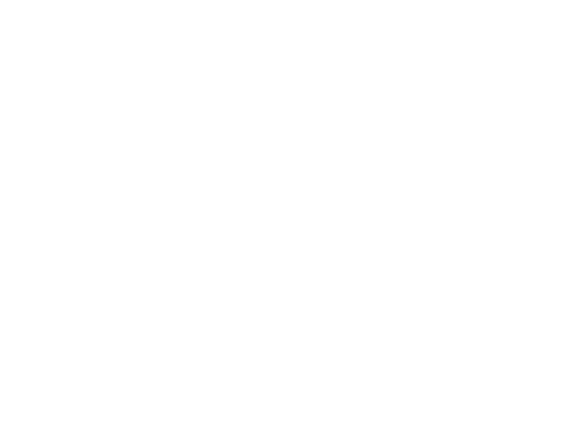

<IPython.core.display.Javascript object>


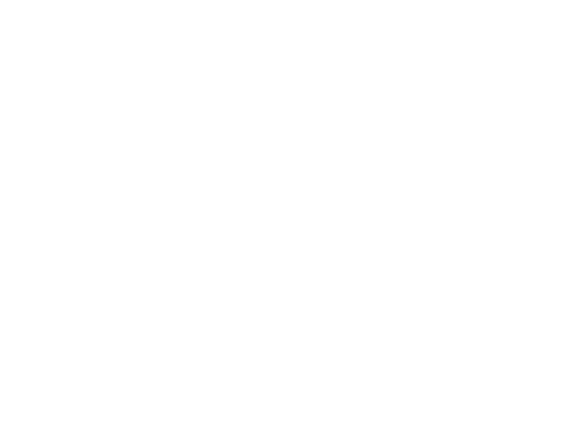

<IPython.core.display.Javascript object>


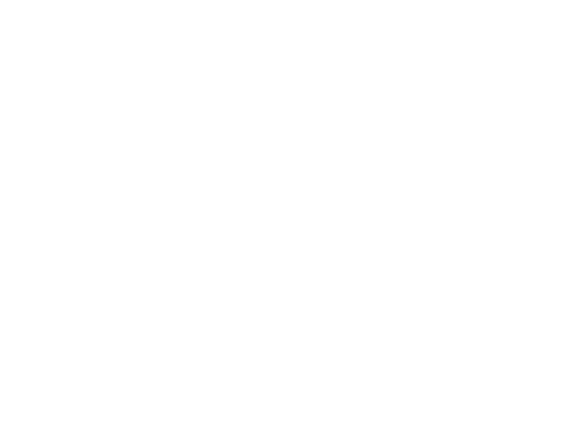

<IPython.core.display.Javascript object>


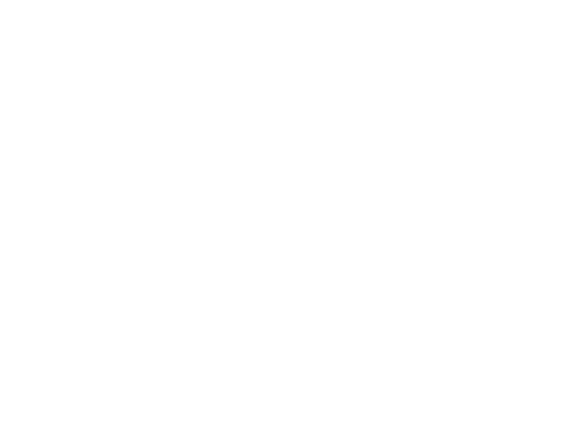

<IPython.core.display.Javascript object>


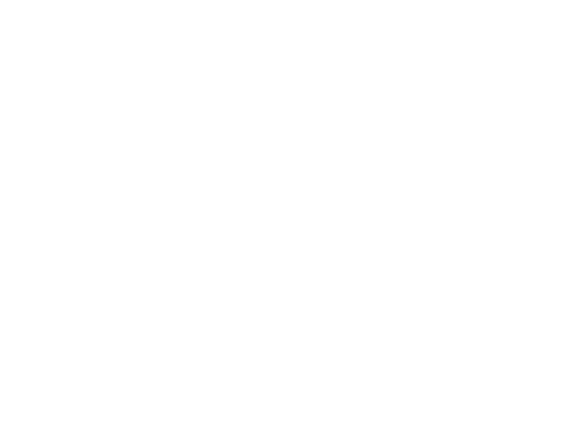

<IPython.core.display.Javascript object>


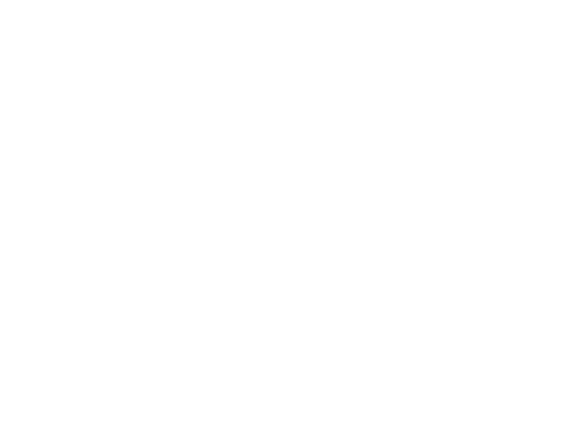

<IPython.core.display.Javascript object>


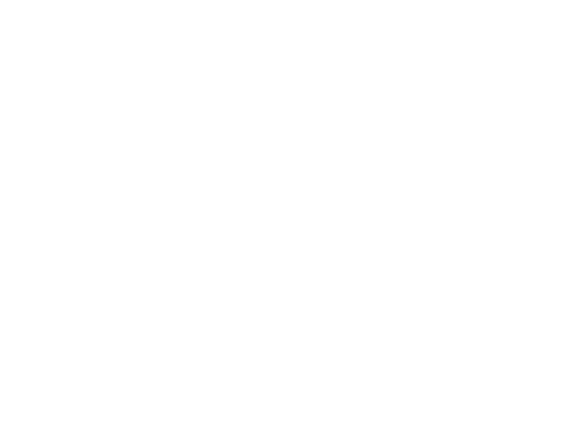

<IPython.core.display.Javascript object>


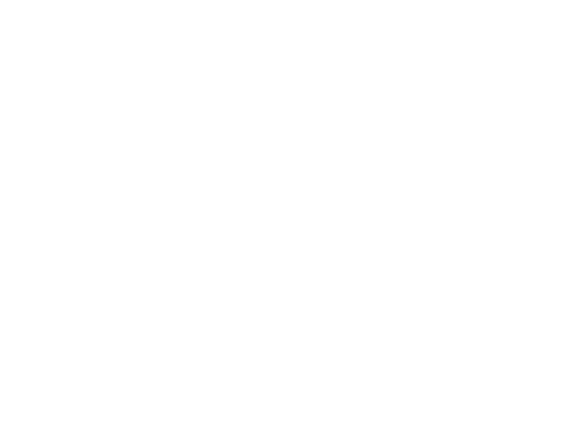

<IPython.core.display.Javascript object>


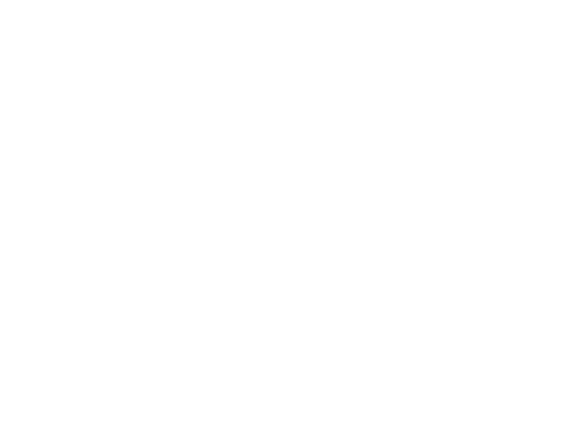

<IPython.core.display.Javascript object>


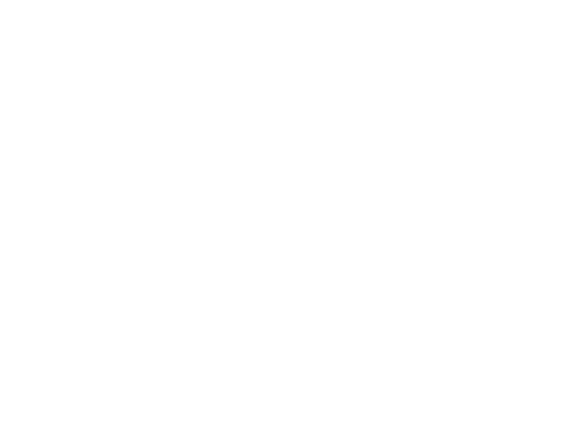

<IPython.core.display.Javascript object>


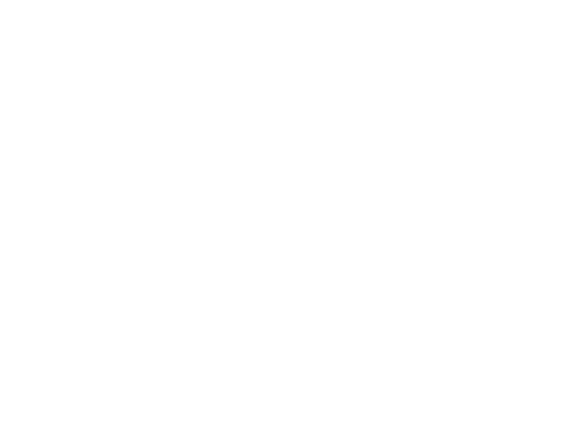

<IPython.core.display.Javascript object>


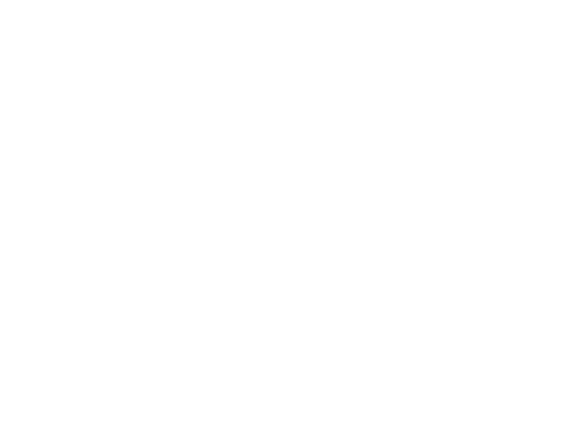

<IPython.core.display.Javascript object>


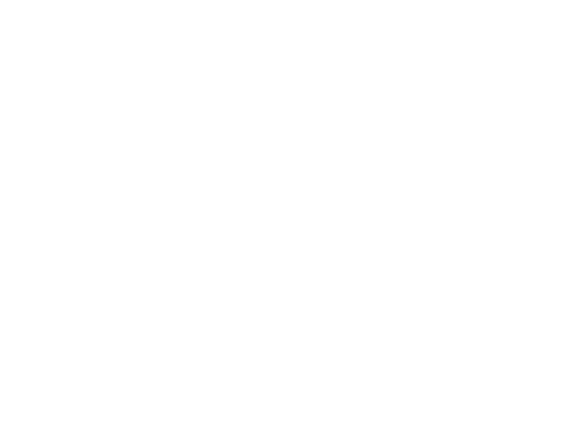

In [97]:
#roi = 428
ymax = 0.1
max_val = 0.2 #round(rmetrics_by_cfg['response_pref'].max(), 1)

plot_polar = True

for roi in rmetrics.index.tolist():
    fig, ax = pl.subplots( subplot_kw=dict(polar=True))

    g = rmetrics_by_cfg.groupby(['cell']).get_group(roi)

    allgofs = []
    for skey in g.index.tolist():
        stimparam = tuple(float(i) for i in skey.split('-')[1::2])
        si = cfgs.index(stimparam)
        bootr = bootresults[roi][stimparam]

        if plot_polar:
            thetas_interp = bootr['fits']['xv']
            thetas = bootr['fits']['xv'][0::n_intervals_interp]
        else:
            thetas_interp = bootr['fits']['xv'][0:-1]
            thetas = bootr['fits']['xv'][0::n_intervals_interp][0:-1]

        # Get combined tuning across iters for current stim config
        #params = [c for c in bootr['results'].columns if 'stim' not in c]
        #avg_metrics = average_metrics_across_iters(bootr['results'][params])
        r2comb, gof, fitr = osi.evaluate_fits(bootr, interp=True)
        origr = bootr['data']['responses'].mean(axis=0).values

        origr = np.append(origr, origr[0]) # wrap back around
        osi.plot_tuning_polar_roi(thetas, origr, curr_sems=None, response_type='dff',
                                  fig=fig, ax=ax, color=colors[si], linestyle=':')

        osi.plot_tuning_polar_roi(thetas_interp, fitr, curr_sems=None, response_type='dff',
                                  fig=fig, ax=ax, color=colors[si], linestyle='-', alpha=0.9,
                                  label='gof %.2f\ndff %.2f' % (gof, origr.max()) )
        allgofs.append(gof)

    #ax.set_title('%i (GoF: %.2f)' % (int(roi), np.mean(allgofs)), fontsize=6, y=1)
    ax.legend(bbox_to_anchor=(-0.1, 1), loc='upper right', ncol=1, fontsize=6)
    #ax.yaxis.grid(False)
    ax.set_ylim([ax.get_ylim()[0], max_val])
    ax.yaxis.set_ticks([0, ymax])
    ax.yaxis.set_ticklabels(['', ymax])
    #ax.tick_params(pad=1)

    ax.xaxis.grid(True)
    ax.xaxis.set_ticklabels([])

    pl.savefig(os.path.join(roidir2, 'roi%05d_polar.svg' % int(roi+1)))
    pl.close()